In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.float', '{:.2f}'.format)
pd.set_option('display.max_columns', 100)
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import warnings
warnings.filterwarnings(action="ignore")

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from random import randint
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('data.csv')

In [4]:
df.head()


,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.37,0.42,0.41,0.60,0.60,1.00,0.80,0.81,0.30,0.78,0.00,0.00,0.46,0.00,0.00,0.15,0.15,0.15,0.17,0.31,0.02,0.10,0.14,0.02,0.85,0.69,0.69,0.22,4980000000.00,0.00,0.26,0.36,0.00,0.00,0.63,0.02,0.21,0.79,0.01,0.39,0.01,0.10,0.14,0.40,0.09,0.00,0.00,0.00,0.00,0.03,0.03,0.39,0.04,0.67,0.17,0.19,0.00,0.00,0.00,0.15,0.33,0.28,0.00,0.68,0.72,0.34,0.03,0.90,0.00,0.06,701000000.00,6550000000.00,0.59,458000000.00,0.67,0.42,0.68,0.34,0.13,0.64,0.46,0.52,0.31,0.12,0,0.72,0.01,0.62,0.60,0.83,0.29,0.03,0.56,1,0.02
1,1,0.46,0.54,0.52,0.61,0.61,1.00,0.80,0.81,0.30,0.78,0.00,0.00,0.46,0.00,0.00,0.18,0.18,0.18,0.21,0.32,0.02,0.09,0.17,0.02,0.85,0.69,0.69,0.22,6110000000.00,0.00,0.26,0.38,0.01,0.00,0.64,0.01,0.17,0.83,0.01,0.38,0.01,0.09,0.17,0.40,0.06,0.00,0.00,9360000000.00,719000000.00,0.03,0.01,0.39,0.01,0.75,0.13,0.18,0.01,0.00,0.00,0.06,0.34,0.29,0.01,0.31,0.73,0.33,0.02,0.93,0.00,0.03,0.00,7700000000.00,0.59,2490000000.00,0.67,0.47,0.31,0.33,0.12,0.64,0.46,0.57,0.31,0.05,0,0.80,0.01,0.62,0.61,0.84,0.28,0.26,0.57,1,0.02
2,1,0.43,0.50,0.47,0.60,0.60,1.00,0.80,0.81,0.30,0.78,0.00,25500000.00,0.46,0.00,0.00,0.18,0.18,0.19,0.18,0.31,0.01,0.09,0.14,0.02,0.85,0.69,0.69,0.22,7280000000.00,0.00,0.26,0.37,0.01,0.01,0.63,0.02,0.21,0.79,0.01,0.38,0.01,0.09,0.15,0.41,0.01,0.00,0.00,65000000.00,2650000000.00,0.01,0.03,0.38,0.14,0.83,0.3

In [5]:
# Display the first few rows of the dataset print(data.head())

df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [6]:
df.shape

(6819, 96)

In [7]:
df.isnull().sum().sort_values(ascending=False).head()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 Total expense/Assets                                       0
 Total income/Total expense                                 0
 Retained Earnings to Total Assets                          0
dtype: int64

In [8]:
df.isnull().sum()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

Since there are no missing values, we can jump into analyzing the data

In [9]:

# Display the number of rows and columns
num_rows, num_columns = df.shape
print(f'Number of rows: {num_rows}, Number of columns: {num_columns}')

Number of rows: 6819, Number of columns: 96


In [10]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64


In [11]:

df.isnull().sum().sum()

0

In [12]:

# Check for duplicate rows
duplicates = df[df.duplicated()]

# Print the duplicate rows
print("Duplicate rows:")
print(duplicates)

# Count the number of duplicate rows
num_duplicates = duplicates.shape[0]
print(f"\nNumber of duplicate rows: {num_duplicates}")

Duplicate rows:
Empty DataFrame
Columns: [Bankrupt?,  ROA(C) before interest and depreciation before interest,  ROA(A) before interest and % after tax,  ROA(B) before interest and depreciation after tax,  Operating Gross Margin,  Realized Sales Gross Margin,  Operating Profit Rate,  Pre-tax net Interest Rate,  After-tax net Interest Rate,  Non-industry income and expenditure/revenue,  Continuous interest rate (after tax),  Operating Expense Rate,  Research and development expense rate,  Cash flow rate,  Interest-bearing debt interest rate,  Tax rate (A),  Net Value Per Share (B),  Net Value Per Share (A),  Net Value Per Share (C),  Persistent EPS in the Last Four Seasons,  Cash Flow Per Share,  Revenue Per Share (Yuan ¥),  Operating Profit Per Share (Yuan ¥),  Per Share Net profit before tax (Yuan ¥),  Realized Sales Gross Profit Growth Rate,  Operating Profit Growth Rate,  After-tax Net Profit Growth Rate,  Regular Net Profit Growth Rate,  Continuous Net Profit Growth Rate,  Total Ass

In [13]:

!pip install klib


Defaulting to user installation because normal site-packages is not writeable


In [14]:
import pandas as pd

# Drop duplicate rows
df_clean = df.drop_duplicates()

# Drop columns with more than 50% missing values
threshold = 0.5
df_clean = df_clean.dropna(thresh=int(threshold * len(df_clean)), axis=1)

# Fill missing values with mean or another method
df_clean = df_clean.fillna(df_clean.mean())
df.head()


,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.37,0.42,0.41,0.60,0.60,1.00,0.80,0.81,0.30,0.78,0.00,0.00,0.46,0.00,0.00,0.15,0.15,0.15,0.17,0.31,0.02,0.10,0.14,0.02,0.85,0.69,0.69,0.22,4980000000.00,0.00,0.26,0.36,0.00,0.00,0.63,0.02,0.21,0.79,0.01,0.39,0.01,0.10,0.14,0.40,0.09,0.00,0.00,0.00,0.00,0.03,0.03,0.39,0.04,0.67,0.17,0.19,0.00,0.00,0.00,0.15,0.33,0.28,0.00,0.68,0.72,0.34,0.03,0.90,0.00,0.06,701000000.00,6550000000.00,0.59,458000000.00,0.67,0.42,0.68,0.34,0.13,0.64,0.46,0.52,0.31,0.12,0,0.72,0.01,0.62,0.60,0.83,0.29,0.03,0.56,1,0.02
1,1,0.46,0.54,0.52,0.61,0.61,1.00,0.80,0.81,0.30,0.78,0.00,0.00,0.46,0.00,0.00,0.18,0.18,0.18,0.21,0.32,0.02,0.09,0.17,0.02,0.85,0.69,0.69,0.22,6110000000.00,0.00,0.26,0.38,0.01,0.00,0.64,0.01,0.17,0.83,0.01,0.38,0.01,0.09,0.17,0.40,0.06,0.00,0.00,9360000000.00,719000000.00,0.03,0.01,0.39,0.01,0.75,0.13,0.18,0.01,0.00,0.00,0.06,0.34,0.29,0.01,0.31,0.73,0.33,0.02,0.93,0.00,0.03,0.00,7700000000.00,0.59,2490000000.00,0.67,0.47,0.31,0.33,0.12,0.64,0.46,0.57,0.31,0.05,0,0.80,0.01,0.62,0.61,0.84,0.28,0.26,0.57,1,0.02
2,1,0.43,0.50,0.47,0.60,0.60,1.00,0.80,0.81,0.30,0.78,0.00,25500000.00,0.46,0.00,0.00,0.18,0.18,0.19,0.18,0.31,0.01,0.09,0.14,0.02,0.85,0.69,0.69,0.22,7280000000.00,0.00,0.26,0.37,0.01,0.01,0.63,0.02,0.21,0.79,0.01,0.38,0.01,0.09,0.15,0.41,0.01,0.00,0.00,65000000.00,2650000000.00,0.01,0.03,0.38,0.14,0.83,0.3

In [15]:
# Display the number of rows and columns
num_rows, num_columns = df.shape
print(f'Number of rows: {num_rows}, Number of columns: {num_columns}')

Number of rows: 6819, Number of columns: 96


In [16]:
import pandas as pd

# Drop duplicates
df = df.drop_duplicates()

# Drop columns with more than 50% missing values
df = df.dropna(thresh=0.5 * len(df), axis=1)

# Fill missing values with mean
df = df.fillna(df.mean())
# Display the number of rows and columns
num_rows, num_columns = df.shape
print(f'Number of rows: {num_rows}, Number of columns: {num_columns}')

Number of rows: 6819, Number of columns: 96


In [17]:
import pandas as pd
import klib

df_clean = klib.data_cleaning(df)

Shape of cleaned data: (6819, 95) - Remaining NAs: 0


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 1
     of which 1 single valued.     Columns: ['net_income_flag']
Dropped missing values: 0
Reduced memory by at least: 2.01 MB (-40.28%)



In [18]:
# Print the cleaned DataFrame
df_clean.head()

,bankrupt,roa_c_before_interest_and_depreciation_before_interest,roa_a_before_interest_and_percent_after_tax,roa_b_before_interest_and_depreciation_after_tax,operating_gross_margin,realized_sales_gross_margin,operating_profit_rate,pre_tax_net_interest_rate,after_tax_net_interest_rate,non_industry_income_and_expenditure_revenue,continuous_interest_rate_after_tax,operating_expense_rate,research_and_development_expense_rate,cash_flow_rate,interest_bearing_debt_interest_rate,tax_rate_a,net_value_per_share_b,net_value_per_share_a,net_value_per_share_c,persistent_eps_in_the_last_four_seasons,cash_flow_per_share,revenue_per_share_yuan_¥,operating_profit_per_share_yuan_¥,per_share_net_profit_before_tax_yuan_¥,realized_sales_gross_profit_growth_rate,operating_profit_growth_rate,after_tax_net_profit_growth_rate,regular_net_profit_growth_rate,continuous_net_profit_growth_rate,total_asset_growth_rate,net_value_growth_rate,total_asset_return_growth_rate_ratio,cash_reinvestment_percent,current_ratio,quick_ratio,interest_expense_ratio,total_debt_total_net_worth,debt_ratio_percent,net_worth_assets,long_term_fund_suitability_ratio_a,borrowing_dependency,contingent_liabilities_net_worth,operating_profit_paid_in_capital,net_profit_before_tax_paid_in_capital,inventory_and_accounts_receivable_net_value,total_asset_turnover,accounts_receivable_turnover,average_collection_days,inventory_turnover_rate_times,fixed_assets_turnover_frequency,net_worth_turnover_rate_times,revenue_per_person,operating_profit_per_person,allocation_rate_per_person,working_capital_to_total_assets,quick_assets_total_assets,current_assets_total_assets,cash_total_assets,quick_assets_current_liability,cash_current_liability,current_liability_to_assets,operating_funds_to_liability,inventory_working_capital,inventory_current_liability,current_liabilities_liability,working_capital_equity,current_liabilities_equity,long_term_liability_to_current_assets,retained_earnings_to_total_assets,total_income_total_expense,total_expense_assets,current_asset_turnover_rate,quick_asset_turnover_rate,working_capitcal_turnover_rate,cash_turnover_rate,cash_flow_to_sales,fixed_assets_to_assets,current_liability_to_liability,current_liability_to_equity,equity_to_long_term_liability,cash_flow_to_total_assets,cash_flow_to_liability,cfo_to_assets,cash_flow_to_equity,current_liability_to_current_assets,liability_assets_flag,net_income_to_total_assets,total_assets_to_gnp_price,no_credit_interval,gross_profit_to_sales,net_income_to_stockholder_s_equity,liability_to_equity,degree_of_financial_leverage_dfl,interest_coverage_ratio_interest_expense_to_ebit,equity_to_liability
0,1,0.37,0.42,0.41,0.60,0.60,1.00,0.80,0.81,0.30,0.78,0.00,0.00,0.46,0.00,0.00,0.15,0.15,0.15,0.17,0.31,0.02,0.10,0.14,0.02,0.85,0.69,0.69,0.22,4980000000.00,0.00,0.26,0.36,0.00,0.00,0.63,0.02,0.21,0.79,0.01,0.39,0.01,0.10,0.14,0.40,0.09,0.00,0.00,0.00,0.00,0.03,0.03,0.39,0.04,0.67,0.17,0.19,0.00,0.00,0.00,0.15,0.33,0.28,0.00,0.68,0.72,0.34,0.03,0.90,0.00,0.06,701000000.00,6550000000.00,0.59,458000000.00,0.67,0.42,0.68,0.34,0.13,0.64,0.46,0.52,0.31,0.12,0,0.72,0.01,0.62,0.60,0.83,0.29,0.03,0.56,0.02
1,1,0.46,0.54,0.52,0.61,0.61,1.00,0.80,0.81,0.30,0.78,0.00,0.00,0.46,0.00,0.00,0.18,0.18,0.18,0.21,0.32,0.02,0.09,0.17,0.02,0.85,0.69,0.69,0.22,6110000000.00,0.00,0.26,0.38,0.01,0.00,0.64,0.01,0.17,0.83,0.01,0.38,0.01,0.09,0.17,0.40,0.06,0.00,0.00,9360000000.00,719000000.00,0.03,0.01,0.39,0.01,0.75,0.13,0.18,0.01,0.00,0.00,0.06,0.34,0.29,0.01,0.31,0.73,0.33,0.02,0.93,0.00,0.03,0.00,7700000000.00,0.59,2490000000.00,0.67,0.47,0.31,0.33,0.12,0.64,0.46,0.57,0.31,0.05,0,0.80,0.01,0.62,0.61,0.84,0.28,0.26,0.57,0.02
2,1,0.43,0.50,0.47,0.60,0.60,1.00,0.80,0.81,0.30,0.78,0.00,25500000.00,0.46,0.00,0.00,0.18,0.18,0.19,0.18,0.31,0.01,0.09,0.14,0.02,0.85,0.69,0.69,0.22,7280000000.00,0.00,0.26,0.37,0.01,0.01,0.63,0.02,0.21,0.79,0.01,0.38,0.01,0.09,0.15,0.41,0.01,0.00,0.00,65000000.00,2650000000.00,0.01,0.03,0.38,0.14,0.83,0.34,0.60,0.00,0.01,5340000000.00,0

In [19]:
df['Borrowing dependency'].hist();

KeyError: 'Borrowing dependency'

In [20]:

# Print the number of rows and columns in the DataFrame
print("Number of rows and columns:", df_clean.shape)


Number of rows and columns: (6819, 95)


# Data Visualization

In [21]:
colors = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap',
          'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 
          'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 
          'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 
          'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 
          'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 
          'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 
          'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 
          'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 
          'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 
          'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 
          'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 
          'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 
          'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 
          'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 
          'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 
          'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r']

The records are observed to be highly imbalanced. Thus it is necessary to consider balancing the dataset through "Upsampling or Downsampling" techniques.

Through data.info(), we observed that we have a majority of "float64" data. The categorical data is distinguished as binary 1 and 0, thus stored as "int64". We separate the numeric and categoric data to analyze our dataset.

In [22]:
numeric_features = df.dtypes[df.dtypes != 'int64'].index
categorical_features = df.dtypes[df.dtypes == 'int64'].index

df[categorical_features].columns.tolist()

['Bankrupt?', ' Liability-Assets Flag', ' Net Income Flag']

In [23]:
print(df.get('Liability-Assets Flag'))


None


In [24]:
print(df.columns)

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

There are only three categorical data columns, we will first explore these columns

In [25]:
# Check if 'Liability_Assets_Flag' and 'Bankrupt' are in the DataFrame
print('Current Liability to Current Assets' in df.columns)
print('Bankrupt' in df.columns)


False
False


In [26]:
print(df['Bankrupt?'].value_counts())
print(df['Bankrupt?'].value_counts(normalize=True))

Bankrupt?
0    6599
1     220
Name: count, dtype: int64
Bankrupt?
0   0.97
1   0.03
Name: proportion, dtype: float64


In [27]:
# Strip whitespace from column names
df.columns = df.columns.str.strip()

# Retry with cleaned column names
column_name = 'Current Liability to Liability'


In [28]:
df['Bankrupt?'].value_counts(normalize= True).plot(kind= 'bar')
plt.xlabel("Bankrupt classes")
plt.ylabel("Frequancy")
plt.title("Class balance");

In [29]:
sns.boxenplot(x="Bankrupt?" , y="Net Income to Total Assets" , data=df)
plt.xlabel("Bankrupt classes")
plt.ylabel("Net Income to Stockholder's Equity', ' Liability to Equity'")
plt.title("DistribuNet Income to Total Assetstion of Profit/ Net Income to Stockholder's Equity', ' Liability to Equity', by Class");

In [30]:
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.37,0.42,0.41,0.60,0.60,1.00,0.80,0.81,0.30,0.78,0.00,0.00,0.46,0.00,0.00,0.15,0.15,0.15,0.17,0.31,0.02,0.10,0.14,0.02,0.85,0.69,0.69,0.22,4980000000.00,0.00,0.26,0.36,0.00,0.00,0.63,0.02,0.21,0.79,0.01,0.39,0.01,0.10,0.14,0.40,0.09,0.00,0.00,0.00,0.00,0.03,0.03,0.39,0.04,0.67,0.17,0.19,0.00,0.00,0.00,0.15,0.33,0.28,0.00,0.68,0.72,0.34,0.03,0.90,0.00,0.06,701000000.00,6550000000.00,0.59,458000000.00,0.67,0.42,0.68,0.34,0.13,0.64,0.46,0.52,0.31,0.12,0,0.72,0.01,0.62,0.60,0.83,0.29,0.03,0.56,1,0.02
1,1,0.46,0.54,0.52,0.61,0.61,1.00,0.80,0.81,0.30,0.78,0.00,0.00,0.46,0.00,0.00,0.18,0.18,0.18,0.21,0.32,0.02,0.09,0.17,0.02,0.85,0.69,0.69,0.22,6110000000.00,0.00,0.26,0.38,0.01,0.00,0.64,0.01,0.17,0.83,0.01,0.38,0.01,0.09,0.17,0.40,0.06,0.00,0.00,9360000000.00,719000000.00,0.03,0.01,0.39,0.01,0.75,0.13,0.18,0.01,0.00,0.00,0.06,0.34,0.29,0.01,0.31,0.73,0.33,0.02,0.93,0.00,0.03,0.00,7700000000.00,0.59,2490000000.00,0.67,0.47,0.31,0.33,0.12,0.64,0.46,0.57,0.31,0.05,0,0.80,0.01,0.62,0.61,0.84,0.28,0.26,0.57,1,0.02
2,1,0.43,0.50,0.47,0.60,0.60,1.00,0.80,0.81,0.30,0.78,0.00,25500000.00,0.46,0.00,0.00,0.18,0.18,0.19,0.18,0.31,0.01,0.09,0.14,0.02,0.85,0.69,0.69,0.22,7280000000.00,0.00,0.26,0.37,0.01,0.01,0.63,0.02,0.21,0.79,0.01,0.38,0.01,0.09,0.15,0.41,0.01,0.00,0.00,65000000.00,2650000000.00,0.01,0.03,0.38,0.14,0.83,0.3

In [31]:
import os
import matplotlib.pyplot as plt

# Check and create the directory if it doesn't exist
output_dir = './images'
os.makedirs(output_dir, exist_ok=True)

# Save the figure
plt.savefig(f'{output_dir}/target_bar.jpg', bbox_inches='tight')


In [32]:
sns.boxenplot(x="Bankrupt?" , y="Net Income to Total Assets" , data=df)
plt.xlabel("Bankrupt classes")
plt.ylabel("Net Income to Total Assets")
plt.title("Distribution of Profit/ Net Income Ratio, by Class");

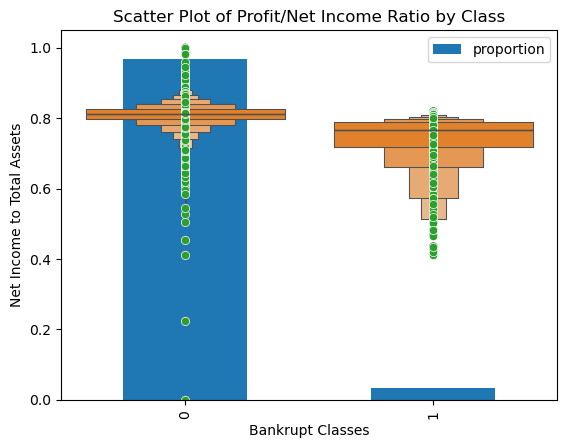

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot
sns.scatterplot(x="Bankrupt?", y="Net Income to Total Assets", data=df)

# Add labels and title
plt.xlabel("Bankrupt Classes")
plt.ylabel("Net Income to Total Assets")
plt.title("Scatter Plot of Profit/Net Income Ratio by Class")

# Display the plot
plt.show()


In [34]:
df['Net Income to Total Assets'].describe()

count   6819.00
mean       0.81
std        0.04
min        0.00
25%        0.80
50%        0.81
75%        0.83
max        1.00
Name: Net Income to Total Assets, dtype: float64

We create a histogram to check whether the distrbution is skewed significantly or not

In [35]:
df["Net Income to Total Assets"].hist()
plt.xlabel("Net Income to Total Assets")
plt.ylabel("count")
plt.title("Distrbution of Net Income to Total Assets Ratio");

In [36]:
q1 , q9 = df['Net Income to Total Assets'].quantile([0.1,0.9])
mask = df["Net Income to Total Assets"].between(q1 , q9)
sns.boxplot(x='Bankrupt?' , y='Net Income to Total Assets', data= df[mask])
plt.xlabel("Bankrupt")
plt.ylabel("Net Income to Total Assets")
plt.title("Distribution of Net Income to Total Assets Ratio, by Bankruptcy Status");

In [37]:
df['Borrowing dependency'].hist();

In [38]:
df['Total assets to GNP price'].hist();

Multicollinearity

In [39]:
corr = df.drop(columns=['Bankrupt?']).corr()
sns.heatmap(corr);

In [40]:
target = "Bankrupt?"
X = df.drop(columns=[target])
y = df[target]

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (6819, 95)
y shape: (6819,)


In [41]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42)

NameError: name 'train_test_split' is not defined

In [42]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

NameError: name 'X_train' is not defined

In [43]:
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay , classification_report ,f1_score
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.pipeline import make_pipeline

In [44]:
over_sampler = RandomOverSampler(random_state=42)
X_train_over , y_train_over = over_sampler.fit_resample(X_train , y_train)
print(X_train_over.shape)
X_train_over.head()

NameError: name 'X_train' is not defined

Build BaseLine 

In [45]:
acc_baseline = y_train.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline, 4))

NameError: name 'y_train' is not defined

iterate

In [46]:
clf = RandomForestClassifier(random_state=42)

In [47]:
params= {
    
    "n_estimators":range(25 , 100 , 25),
    "max_depth": range(10 , 70 , 10)
    
}
params

{'n_estimators': range(25, 100, 25), 'max_depth': range(10, 70, 10)}

In [48]:
model = GridSearchCV(

    clf,
    param_grid= params,
    cv=5,
    n_jobs=-1,
    verbose= 1

)
model

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(10, 70, 10),
                         'n_estimators': range(25, 100, 25)},
             verbose=1)

In [49]:
model.fit(X_train_over , y_train_over)

NameError: name 'X_train_over' is not defined

In [50]:
cv_results = pd.DataFrame(model.cv_results_)
cv_results.sort_values('rank_test_score').head(10)

AttributeError: 'GridSearchCV' object has no attribute 'cv_results_'

In [51]:
model.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [52]:
model.predict(X_train_over)

NameError: name 'X_train_over' is not defined

In [53]:
acc_train = model.score(X_train_over , y_train_over)
acc_test = model.score(X_test , y_test)

print(f"Training accuracy: {round(acc_train , 4)}")
print(f"test accuracy: {round(acc_test , 4)}")

NameError: name 'X_train_over' is not defined

In [54]:
import shap
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split

# 1. Load your dataset (replace 'data' with your actual dataset)
# Assuming 'data' is a DataFrame where the last column is the target variable ('Bankrupt')
X = df.drop(columns=['Bankrupt?'])  # Replace 'Bankrupt' with your actual target column name if needed
y = df['Bankrupt?']  # 'Bankrupt' is the target variable

# 2. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Train an XGBoost model
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

# 4. Calculate SHAP values using the model
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

# 5. Visualize the feature importance
shap.summary_plot(shap_values, X_train)

# 6. Identify the most important features (e.g., top 10)
# SHAP importance summary
shap.summary_plot(shap_values, X_train, plot_type="bar")

# Extract the feature importance based on SHAP values
importance = pd.DataFrame(list(zip(X.columns, shap_values.mean(0))), columns=['Feature', 'Importance'])
importance = importance.sort_values(by='Importance', ascending=False)

# Display the top 10 important features
top_10_features = importance.head(10)
print("Top 10 Features Based on SHAP Importance:")
print(top_10_features)

# 7. Reduce the feature set by selecting the most important features
X_train_reduced = X_train[top_10_features['Feature']]
X_test_reduced = X_test[top_10_features['Feature']]

# 8. Retrain the model using the reduced feature set
model_reduced = xgb.XGBClassifier()
model_reduced.fit(X_train_reduced, y_train)

# 9. Evaluate the model (you can use any metric like accuracy, precision, recall, etc.)
accuracy = model_reduced.score(X_test_reduced, y_test)
print(f"Accuracy with reduced feature set: {accuracy:.4f}")


ModuleNotFoundError: No module named 'shap'

In [55]:
import shap
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.datasets import make_classification

# 1. Load your dataset (replace 'data' with your actual dataset)
# Assuming 'data' is a DataFrame where the target column is 'Bankrupt'
X = df.drop(columns=['Bankrupt?'])  # Replace 'Bankrupt' with your actual target column name
y = df['Bankrupt?']  # 'Bankrupt' is the target variable

# 2. Train an XGBoost model
model = xgb.XGBClassifier()

# 3. Implement cross-validation
# Perform K-fold cross-validation (default is 5 folds)
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')  # You can change 'accuracy' to other metrics like 'precision' or 'recall'

# 4. Output cross-validation results
print(f"Cross-validation Accuracy Scores: {cv_scores}")
print(f"Mean Cross-validation Accuracy: {cv_scores.mean():.4f}")
print(f"Standard Deviation of Cross-validation Accuracy: {cv_scores.std():.4f}")

# 5. Train the model on the full training data
model.fit(X, y)

# 6. Calculate SHAP values using the model
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

# 7. Visualize the feature importance
shap.summary_plot(shap_values, X)

# 8. Identify the most important features (e.g., top 10)
shap.summary_plot(shap_values, X, plot_type="bar")

# Extract the feature importance based on SHAP values
importance = pd.DataFrame(list(zip(X.columns, shap_values.mean(0))), columns=['Feature', 'Importance'])
importance = importance.sort_values(by='Importance', ascending=False)

# Display the top 10 important features
top_10_features = importance.head(10)
print("Top 10 Features Based on SHAP Importance:")
print(top_10_features)

# 9. Reduce the feature set by selecting the most important features
X_reduced = X[top_10_features['Feature']]

# 10. Retrain the model using the reduced feature set
model_reduced = xgb.XGBClassifier()
model_reduced.fit(X_reduced, y)

# 11. Evaluate the model on the full dataset (optional)
accuracy = model_reduced.score(X_reduced, y)
print(f"Accuracy with reduced feature set: {accuracy:.4f}")


ModuleNotFoundError: No module named 'shap'

In [56]:
# 4. Output cross-validation results
print(f"Cross-validation Accuracy Scores: {cv_scores}")
print(f"Mean Cross-validation Accuracy: {cv_scores.mean():.4f}")
print(f"Standard Deviation of Cross-validation Accuracy: {cv_scores.std():.4f}")

# 5. Train the model on the full training data
model.fit(X, y)

NameError: name 'cv_scores' is not defined

In [57]:
# 5. Visualize the cross-validation results using a boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=cv_scores)
plt.title('Cross-Validation Accuracy Scores')
plt.ylabel('Accuracy')
plt.show()

NameError: name 'cv_scores' is not defined

In [58]:

# 6. Optionally, you can visualize the cross-validation results using a histogram
plt.figure(figsize=(8, 6))
sns.histplot(cv_scores, kde=True, bins=5)
plt.title('Distribution of Cross-Validation Accuracy Scores')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.show()

NameError: name 'cv_scores' is not defined

In [59]:

# 7. Train the model on the full training data
model.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(10, 70, 10),
                         'n_estimators': range(25, 100, 25)},
             verbose=1)

In [60]:
# 8. Calculate SHAP values using the model
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

NameError: name 'shap' is not defined

In [ ]:
# 9. Visualize the feature importance
shap.summary_plot(shap_values, X)

In [ ]:
# 10. Identify the most important features (e.g., top 10)
shap.summary_plot(shap_values, X, plot_type="bar")

In [ ]:
# Extract the feature importance based on SHAP values
importance = pd.DataFrame(list(zip(X.columns, shap_values.mean(0))), columns=['Feature', 'Importance'])
importance = importance.sort_values(by='Importance', ascending=False)

In [ ]:

# Display the top 10 important features
top_10_features = importance.head(10)
print("Top 10 Features Based on SHAP Importance:")
print(top_10_features)


In [ ]:
# 11. Reduce the feature set by selecting the most important features
X_reduced = X[top_10_features['Feature']]

In [ ]:

# 12. Retrain the model using the reduced feature set
model_reduced = xgb.XGBClassifier()
model_reduced.fit(X_reduced, y)

In [ ]:
# 13. Evaluate the model on the full dataset (optional)
accuracy = model_reduced.score(X_reduced, y)
print(f"Accuracy with reduced feature set: {accuracy:.4f}")

# solving imbalace of data set 

In [ ]:
# 2. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Visualize class distribution before applying SMOTE
print("Class distribution before SMOTE:")
print(y_train.value_counts())

# 4. Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# 5. Visualize class distribution after applying SMOTE
print("Class distribution after SMOTE:")
print(pd.Series(y_train_smote).value_counts())

In [ ]:
# 5. Visualize class distribution after applying SMOTE
print("Class distribution after SMOTE:")
print(pd.Series(y_train_smote).value_counts())

In [ ]:

# 1. Class distribution before applying SMOTE
print("Class distribution before SMOTE:")
print(y_train.value_counts())

# 2. Class distribution after applying SMOTE
print("Class distribution after SMOTE:")
print(pd.Series(y_train_smote).value_counts())

# Create side-by-side bar plots to visualize the class distribution before and after SMOTE
plt.figure(figsize=(12, 6))

# Plot before SMOTE
plt.subplot(1, 2, 1)
sns.countplot(x=y_train, palette='viridis')
plt.title("Class Distribution Before SMOTE")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.xticks([0, 1], ['Non-Bankrupt', 'Bankrupt'])

# Plot after SMOTE
plt.subplot(1, 2, 2)
sns.countplot(x=y_train_smote, palette='viridis')
plt.title("Class Distribution After SMOTE")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.xticks([0, 1], ['Non-Bankrupt', 'Bankrupt'])

plt.tight_layout()
plt.show()

# Alternatively, create a combined pie chart
plt.figure(figsize=(12, 6))

# Pie chart for before SMOTE
plt.subplot(1, 2, 1)
y_train.value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title("Class Distribution Before SMOTE")
plt.ylabel("")  # Hide the y-label

# Pie chart for after SMOTE
plt.subplot(1, 2, 2)
pd.Series(y_train_smote).value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title("Class Distribution After SMOTE")
plt.ylabel("")  # Hide the y-label

plt.tight_layout()
plt.show()

In [ ]:
# Assuming `data` is your dataset and the target column is 'Bankrupt'
X = df.drop(columns=['Bankrupt?'])  # Features
y = df['Bankrupt?']  # Target (Bankrupt or not)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42)
}

# Dictionary to store the results
results = {}

# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Store the results
    results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    }
    
    # Print classification report for each model
    print(f"Classification Report for {model_name}:")
    print(classification_report(y_test, y_pred))
    print('-' * 50)

# Convert results into a DataFrame for easier comparison
results_df = pd.DataFrame(results).T
print("\nModel Comparison:")
print(results_df)

# Optionally, visualize the comparison (e.g., bar plots)
# Plot comparison of models based on accuracy
results_df['Accuracy'].plot(kind='bar', figsize=(8, 6), color=['skyblue', 'lightgreen', 'orange', 'lightcoral'])
plt.title("Model Comparison Based on Accuracy")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.show()

# Plot comparison of models based on F1-score
results_df['F1-Score'].plot(kind='bar', figsize=(8, 6), color=['skyblue', 'lightgreen', 'orange', 'lightcoral'])
plt.title("Model Comparison Based on F1-Score")
plt.xlabel("Model")
plt.ylabel("F1-Score")
plt.xticks(rotation=45)
plt.show()

In [ ]:

# Visualize the comparison based on Precision
results_df['Precision'].plot(kind='bar', figsize=(8, 6), color=['skyblue', 'lightgreen', 'orange', 'lightcoral'])
plt.title("Model Comparison Based on Precision")
plt.xlabel("Model")
plt.ylabel("Precision")
plt.xticks(rotation=45)
plt.show()

In [ ]:

# Optionally, visualize the comparison (e.g., bar plots)
# Plot comparison of models based on accuracy
results_df['Accuracy'].plot(kind='bar', figsize=(8, 6), color=['skyblue', 'lightgreen', 'orange', 'lightcoral'])
plt.title("Model Comparison Based on Accuracy")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Plot comparison of models based on F1-score
results_df['F1-Score'].plot(kind='bar', figsize=(8, 6), color=['skyblue', 'lightgreen', 'orange', 'lightcoral'])
plt.title("Model Comparison Based on F1-Score")
plt.xlabel("Model")
plt.ylabel("F1-Score")
plt.xticks(rotation=45)
plt.show()

In [ ]:

# Define custom colors for the bar plot
colors = ['skyblue', 'lightgreen', 'orange', 'lightcoral']

# Visualize the comparison based on all metrics with the custom colors
results_df.plot(kind='bar', figsize=(10, 6), color=colors)
plt.title("Model Comparison Based on Accuracy, Precision, Recall, and F1-Score")
plt.xlabel("Model")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

# applying cross validation 

In [ ]:


# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42)
}

# Dictionary to store the results of cross-validation
cv_results = {}

# Stratified K-Fold Cross Validation to preserve the percentage of samples for each class
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Validate each model using cross-validation
for model_name, model in models.items():
    # Cross-validation scores (using accuracy, but you can modify it for other metrics)
    scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    
    # Store the mean and standard deviation of the cross-validation scores
    cv_results[model_name] = {
        'Mean Accuracy': np.mean(scores),
        'Std Accuracy': np.std(scores)
    }

# Convert the cross-validation results into a DataFrame for easy comparison
cv_results_df = pd.DataFrame(cv_results).T

# Sort by the mean accuracy score
cv_results_df = cv_results_df.sort_values(by='Mean Accuracy', ascending=False)

print("\nCross-Validation Results (Sorted by Mean Accuracy):")
print(cv_results_df)

# Define custom colors for the bar plot
colors = ['skyblue', 'lightgreen', 'orange', 'lightcoral']

# Visualize the cross-validation results based on mean accuracy
cv_results_df['Mean Accuracy'].plot(kind='bar', figsize=(10, 6), color=colors)
plt.title("Cross-Validation Results (Mean Accuracy) for Models")
plt.xlabel("Model")
plt.ylabel("Mean Accuracy")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
 #zDictionary to store the results of cross-validation
cv_results = {}

# Stratified K-Fold Cross Validation to preserve the percentage of samples for each class
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Validate each model using cross-validation
for model_name, model in models.items():
    # Cross-validation scores (using accuracy, but you can modify it for other metrics)
    scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    
    # Store the mean and standard deviation of the cross-validation scores
    cv_results[model_name] = {
        'Mean Accuracy (%)': np.mean(scores) * 100,  # Convert to percentage
        'Std Accuracy (%)': np.std(scores) * 100     # Convert to percentage
    }

# Convert the cross-validation results into a DataFrame for easy comparison
cv_results_df = pd.DataFrame(cv_results).T

# Sort by the mean accuracy score
cv_results_df = cv_results_df.sort_values(by='Mean Accuracy (%)', ascending=False)

print("\nCross-Validation Results (Sorted by Mean Accuracy in Percentage):")
print(cv_results_df)

# Define custom colors for the bar plot
colors = ['skyblue', 'lightgreen', 'orange', 'lightcoral']

# Visualize the cross-validation results based on mean accuracy
cv_results_df['Mean Accuracy (%)'].plot(kind='bar', figsize=(10, 6), color=colors)
plt.title("Cross-Validation Results (Mean Accuracy in Percentage) for Models")
plt.xlabel("Model")
plt.ylabel("Mean Accuracy (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [53]:
# Import necessary libraries for evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Dictionary to store evaluation metrics for each model
evaluation_results = {}

# Evaluate each model
for model_name, model in models.items():
    # Train the model on the training data
    model.fit(X_train, y_train)
    
    # Predict on the test data
    y_pred = model.predict(X_test)
    
    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])  # AUC for binary classification
    
    # Store the results in the dictionary
    evaluation_results[model_name] = {
        'Accuracy': accuracy * 100,  # Convert to percentage
        'Precision': precision * 100,  # Convert to percentage
        'Recall': recall * 100,  # Convert to percentage
        'F1 Score': f1 * 100,  # Convert to percentage
        'AUC': auc * 100  # Convert to percentage
    }
    
    # Optionally, print confusion matrix and classification report
    print(f"\n{model_name} Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    
    print(f"\n{model_name} Classification Report:")
    print(classification_report(y_test, y_pred))

# Convert the evaluation results into a DataFrame for easy comparison
evaluation_df = pd.DataFrame(evaluation_results).T

# Sort models based on Accuracy
evaluation_df = evaluation_df.sort_values(by='Accuracy', ascending=False)

# Print evaluation results
print("\nModel Evaluation Results:")
print(evaluation_df)

# Visualize the evaluation results
evaluation_df[['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC']].plot(kind='bar', figsize=(10, 6), color=['skyblue', 'lightgreen', 'orange', 'lightcoral', 'lightblue'])
plt.title("Model Evaluation Results")
plt.ylabel("Score (%)")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


NameError: name 'models' is not defined

In [54]:
# Import necessary libraries for evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Dictionary to store evaluation metrics for each model
evaluation_results = {}

# Evaluate each model
for model_name, model in models.items():
    # Train the model on the training data
    model.fit(X_train, y_train)
    
    # Predict on the test data
    y_pred = model.predict(X_test)
    
    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred) * 100  # Convert to percentage
    precision = precision_score(y_test, y_pred) * 100  # Convert to percentage
    recall = recall_score(y_test, y_pred) * 100  # Convert to percentage
    f1 = f1_score(y_test, y_pred) * 100  # Convert to percentage
    auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]) * 100  # AUC for binary classification
    
    # Store the results in the dictionary
    evaluation_results[model_name] = {
        'Accuracy (%)': accuracy,
        'Precision (%)': precision,
        'Recall (%)': recall,
        'F1 Score (%)': f1,
        'AUC (%)': auc
    }
    
    # Optionally, print confusion matrix and classification report
    print(f"\n{model_name} Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    
    print(f"\n{model_name} Classification Report:")
    print(classification_report(y_test, y_pred))

# Convert the evaluation results into a DataFrame for easy comparison
evaluation_df = pd.DataFrame(evaluation_results).T

# Sort models based on Accuracy
evaluation_df = evaluation_df.sort_values(by='Accuracy (%)', ascending=False)

# Print evaluation results
print("\nModel Evaluation Results (in Percentage):")
print(evaluation_df)

# Visualize the evaluation results
evaluation_df[['Accuracy (%)', 'Precision (%)', 'Recall (%)', 'F1 Score (%)', 'AUC (%)']].plot(kind='bar', figsize=(10, 6), color=['skyblue', 'lightgreen', 'orange', 'lightcoral', 'lightblue'])
plt.title("Model Evaluation Results (in Percentage)")
plt.ylabel("Score (%)")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


NameError: name 'models' is not defined

In [55]:
# Import necessary libraries for evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Dictionary to store evaluation metrics for each model
evaluation_results = {}

# Evaluate each model
for model_name, model in models.items():
    # Train the model on the training data
    model.fit(X_train, y_train)
    
    # Predict on the test data
    y_pred = model.predict(X_test)
    
    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred) * 100  # Convert to percentage
    precision = precision_score(y_test, y_pred) * 100  # Convert to percentage
    recall = recall_score(y_test, y_pred) * 100  # Convert to percentage
    f1 = f1_score(y_test, y_pred) * 100  # Convert to percentage
    auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]) * 100  # AUC for binary classification
    
    # Store the results in the dictionary
    evaluation_results[model_name] = {
        'Model Score (%)': accuracy,
        'Precision (%)': precision,
        'Recall (%)': recall,
        'F1 Score (%)': f1,
        'ROC-AUC Score (%)': auc
    }
    
    # Optionally, print confusion matrix and classification report
    print(f"\n{model_name} Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    
    print(f"\n{model_name} Classification Report:")
    print(classification_report(y_test, y_pred))

# Convert the evaluation results into a DataFrame for easy comparison
evaluation_df = pd.DataFrame(evaluation_results).T

# Sort models based on Accuracy
evaluation_df = evaluation_df.sort_values(by='Model Score (%)', ascending=False)

# Print evaluation results
print("\nModel Evaluation Results (in Percentage):")
print(evaluation_df)

# Visualize the evaluation results
evaluation_df[['Model Score (%)', 'Precision (%)', 'Recall (%)', 'F1 Score (%)', 'ROC-AUC Score (%)']].plot(kind='bar', figsize=(10, 6), color=['skyblue', 'lightgreen', 'orange', 'lightcoral', 'lightblue'])
plt.title("Model Evaluation Results (in Percentage)")
plt.ylabel("Score (%)")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


NameError: name 'models' is not defined

In [56]:
# Convert the evaluation results into a DataFrame for easy comparison
evaluation_df = pd.DataFrame(evaluation_results).T

# Sort models based on F1 Score (or any other metric)
evaluation_df_sorted = evaluation_df.sort_values(by='F1 Score (%)', ascending=False)

# Print evaluation results sorted by F1 Score
print("\nModel Evaluation Results (Sorted by F1 Score in Percentage):")
print(evaluation_df_sorted)

KeyError: 'F1 Score (%)'

In [57]:
evaluation_df.sort_values('F1 Score (%)', ascending=False)

KeyError: 'F1 Score (%)'

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}


In [59]:


# Visualize the evaluation results for F1 Score and ROC-AUC Score
# Plot F1 Score and ROC-AUC Score separately
plt.figure(figsize=(12, 6))

# Plot for F1 Score
plt.subplot(1, 2, 1)
evaluation_df_sorted['F1 Score (%)'].plot(kind='bar', color='lightcoral')
plt.title("F1 Score (%) of Models")
plt.ylabel("F1 Score (%)")
plt.xticks(rotation=45)

# Plot for ROC-AUC Score
plt.subplot(1, 2, 2)
evaluation_df_sorted['ROC-AUC Score (%)'].plot(kind='bar', color='lightblue')
plt.title("ROC-AUC Score (%) of Models")
plt.ylabel("ROC-AUC Score (%)")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


NameError: name 'evaluation_df_sorted' is not defined

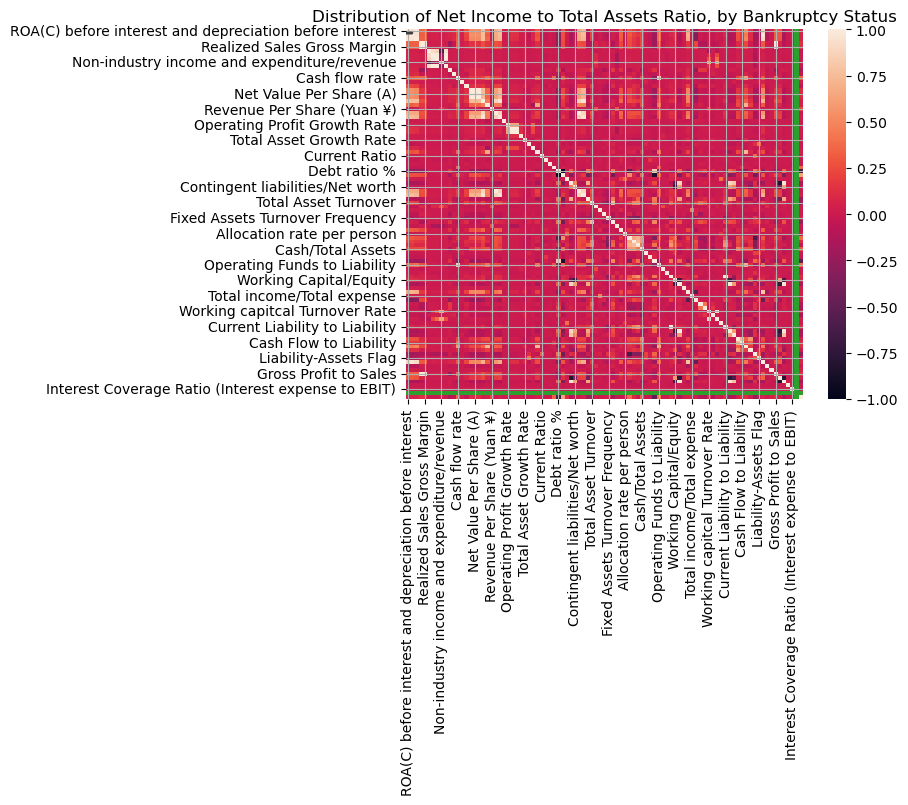

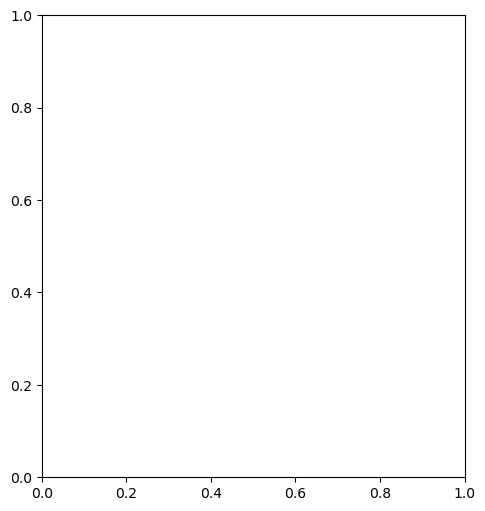

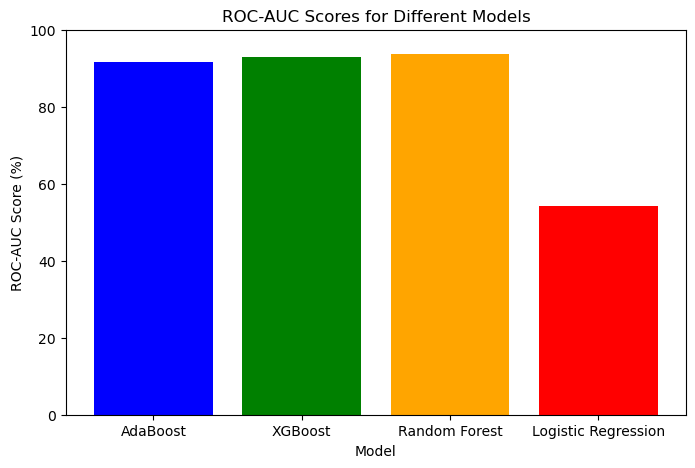

In [60]:
import matplotlib.pyplot as plt

# Data for the plot
models = ['AdaBoost', 'XGBoost', 'Random Forest', 'Logistic Regression']
auc_scores = [91.71, 92.92, 93.68, 54.29]

# Create the plot
plt.figure(figsize=(8, 5))
plt.bar(models, auc_scores, color=['blue', 'green', 'orange', 'red'])

# Add titles and labels
plt.title('ROC-AUC Scores for Different Models')
plt.xlabel('Model')
plt.ylabel('ROC-AUC Score (%)')
plt.ylim(0, 100)

# Display the plot
plt.show()


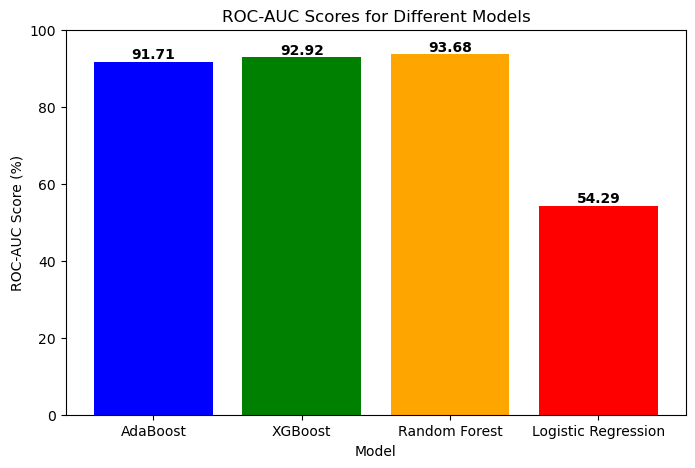

In [61]:
import matplotlib.pyplot as plt

# Data for the plot
models = ['AdaBoost', 'XGBoost', 'Random Forest', 'Logistic Regression']
auc_scores = [91.71, 92.92, 93.68, 54.29]

# Create the plot
plt.figure(figsize=(8, 5))
bars = plt.bar(models, auc_scores, color=['blue', 'green', 'orange', 'red'])

# Add titles and labels
plt.title('ROC-AUC Scores for Different Models')
plt.xlabel('Model')
plt.ylabel('ROC-AUC Score (%)')
plt.ylim(0, 100)

# Add lines on top of each bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
             f'{bar.get_height():.2f}', ha='center', va='bottom', fontweight='bold')

# Display the plot
plt.show()


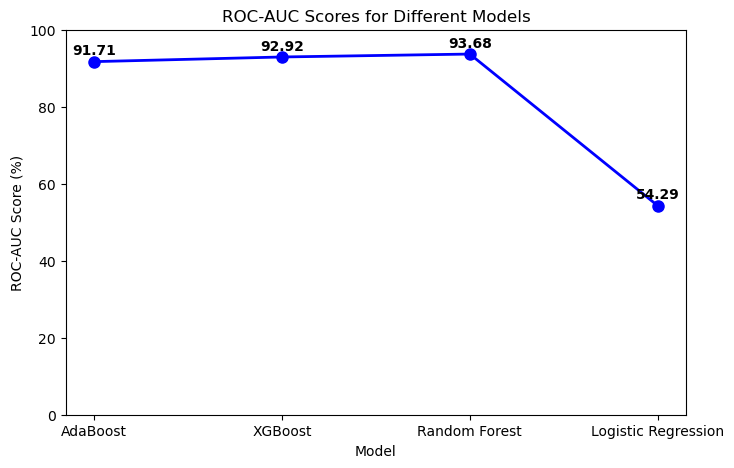

In [78]:
import matplotlib.pyplot as plt

# Data for the plot
models = ['AdaBoost', 'XGBoost', 'Random Forest', 'Logistic Regression']
auc_scores = [91.71, 92.92, 93.68, 54.29]

# Create the plot
plt.figure(figsize=(8, 5))
plt.plot(models, auc_scores, marker='o', color='b', linestyle='-', linewidth=2, markersize=8)

# Add titles and labels
plt.title('ROC-AUC Scores for Different Models')
plt.xlabel('Model')
plt.ylabel('ROC-AUC Score (%)')
plt.ylim(0, 100)

# Add lines on the graph with annotations for each point
for i, score in enumerate(auc_scores):
    plt.text(models[i], score + 1, f'{score:.2f}', ha='center', va='bottom', fontweight='bold')

# Display the plot
plt.show()


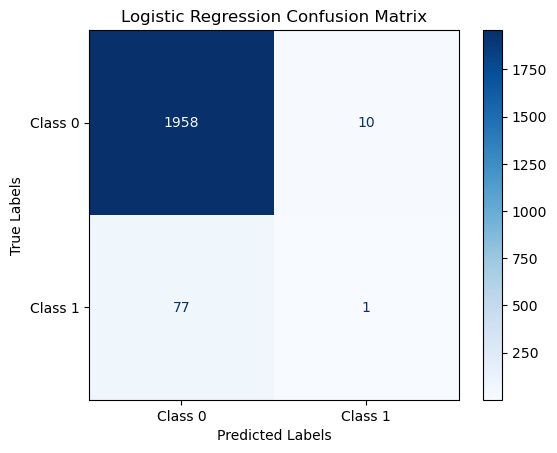

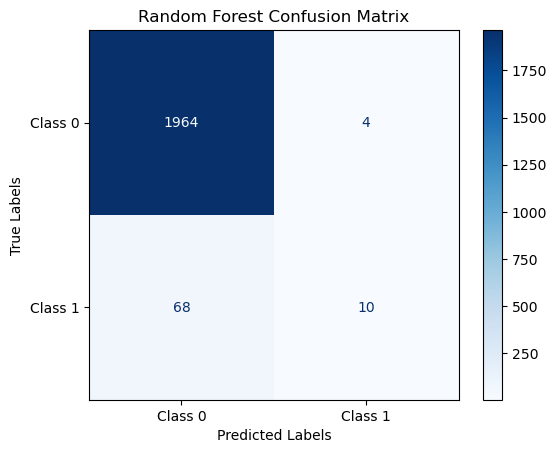

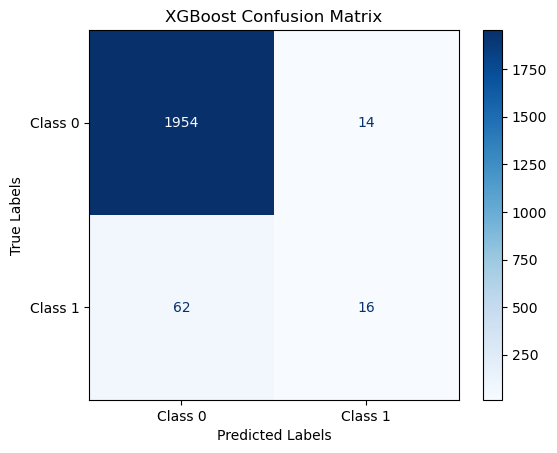

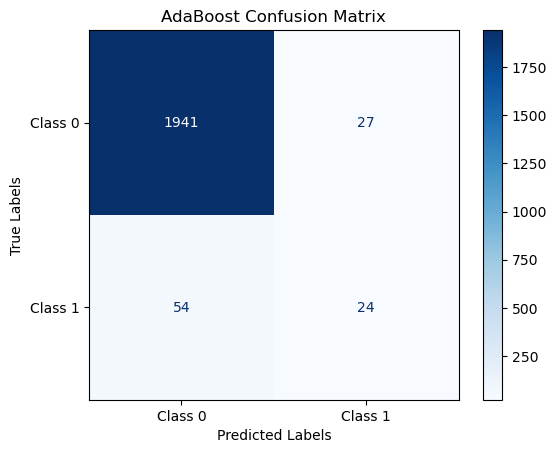

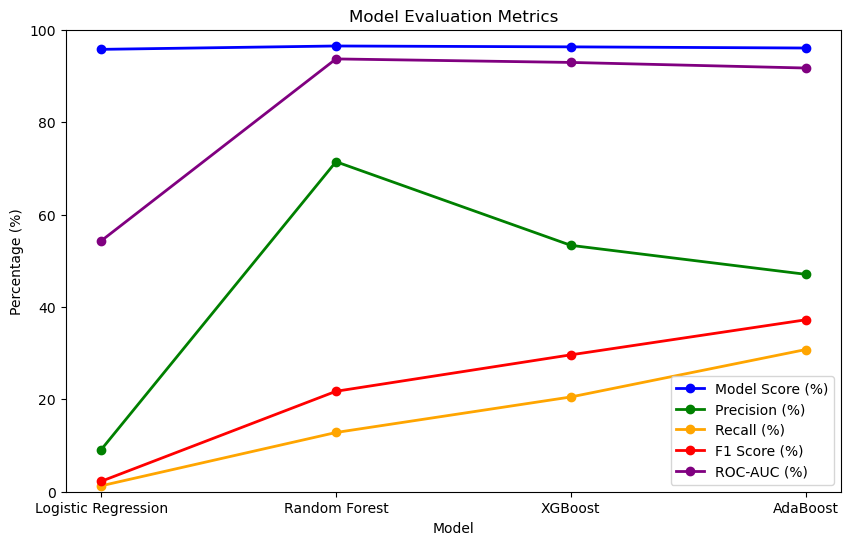

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion Matrix for Logistic Regression
y_true_lr = [0] * 1968 + [1] * 78  # Actual labels
y_pred_lr = [0] * 1958 + [1] * 10 + [0] * 77 + [1] * 1  # Predicted labels

# Generate confusion matrix for Logistic Regression
cm_lr = confusion_matrix(y_true_lr, y_pred_lr)

# Display confusion matrix for Logistic Regression
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=['Class 0', 'Class 1'])
disp_lr.plot(cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Confusion Matrix for Random Forest
y_true_rf = [0] * 1968 + [1] * 78
y_pred_rf = [0] * 1964 + [1] * 4 + [0] * 68 + [1] * 10

# Generate confusion matrix for Random Forest
cm_rf = confusion_matrix(y_true_rf, y_pred_rf)

# Display confusion matrix for Random Forest
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=['Class 0', 'Class 1'])
disp_rf.plot(cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Confusion Matrix for XGBoost
y_true_xgb = [0] * 1968 + [1] * 78
y_pred_xgb = [0] * 1954 + [1] * 14 + [0] * 62 + [1] * 16

# Generate confusion matrix for XGBoost
cm_xgb = confusion_matrix(y_true_xgb, y_pred_xgb)

# Display confusion matrix for XGBoost
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=['Class 0', 'Class 1'])
disp_xgb.plot(cmap='Blues')
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Confusion Matrix for AdaBoost
y_true_ab = [0] * 1968 + [1] * 78
y_pred_ab = [0] * 1941 + [1] * 27 + [0] * 54 + [1] * 24

# Generate confusion matrix for AdaBoost
cm_ab = confusion_matrix(y_true_ab, y_pred_ab)

# Display confusion matrix for AdaBoost
disp_ab = ConfusionMatrixDisplay(confusion_matrix=cm_ab, display_labels=['Class 0', 'Class 1'])
disp_ab.plot(cmap='Blues')
plt.title('AdaBoost Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Model Evaluation Results (in Percentage)
models = ['Logistic Regression', 'Random Forest', 'XGBoost', 'AdaBoost']
model_scores = [95.75, 96.48, 96.29, 96.04]
precision = [9.09, 71.43, 53.33, 47.06]
recall = [1.28, 12.82, 20.51, 30.77]
f1_score = [2.25, 21.74, 29.63, 37.21]
roc_auc = [54.29, 93.68, 92.92, 91.71]

# Plot Model Evaluation Results
fig, ax = plt.subplots(figsize=(10, 6))

# Create the line graph
ax.plot(models, model_scores, marker='o', label='Model Score (%)', color='blue', linestyle='-', linewidth=2)
ax.plot(models, precision, marker='o', label='Precision (%)', color='green', linestyle='-', linewidth=2)
ax.plot(models, recall, marker='o', label='Recall (%)', color='orange', linestyle='-', linewidth=2)
ax.plot(models, f1_score, marker='o', label='F1 Score (%)', color='red', linestyle='-', linewidth=2)
ax.plot(models, roc_auc, marker='o', label='ROC-AUC (%)', color='purple', linestyle='-', linewidth=2)

# Add titles and labels
ax.set_title('Model Evaluation Metrics')
ax.set_xlabel('Model')
ax.set_ylabel('Percentage (%)')
ax.set_ylim(0, 100)

# Display legend
ax.legend()

# Show the plot
plt.show()


In [80]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming `df` is your DataFrame, and 'Bankrupt?' is the target column
X = df.drop(columns=['Bankrupt?'])  # Features
y = df['Bankrupt?']  # Target (Bankrupt or not)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42)
}

# Train each model and compute AUC
plt.figure(figsize=(10, 8))

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Get probabilities for ROC curve
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label="{} AUC={:.3f}".format(model_name, roc_auc))

# Plot a diagonal line representing random predictions
plt.plot([0, 1], [0, 1], color='black', linestyle='--')

# Labels and title
plt.ylabel('True Positive Rate (Sensitivity)', fontsize=15)
plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=15)
plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)

# Display the legend
plt.legend(prop={'size': 10}, loc='lower right')

# Show the plot
plt.show()


ModuleNotFoundError: No module named 'xgboost'

In [81]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming `df` is your DataFrame, and 'Bankrupt?' is the target column
X = df.drop(columns=['Bankrupt?'])  # Features
y = df['Bankrupt?']  # Target (Bankrupt or not)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42)
}

# Create a list to store AUC scores
auc_scores = []

# Plotting the ROC curve for all models
plt.figure(figsize=(10, 8))

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Get probabilities for ROC curve (for positive class)
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    roc_auc = auc(fpr, tpr)
    auc_scores.append((model_name, roc_auc))
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label="{} AUC={:.3f}".format(model_name, roc_auc))

# Plot a diagonal line representing random predictions
plt.plot([0, 1], [0, 1], color='black', linestyle='--')

# Labels and title
plt.ylabel('True Positive Rate (Sensitivity)', fontsize=15)
plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=15)
plt.title('ROC Curve Analysis for All Models', fontweight='bold', fontsize=15)

# Display the legend
plt.legend(prop={'size': 10}, loc='lower right')

# Show the plot
plt.show()

# Print AUC scores for each model
print("AUC Scores:")
for model_name, auc_score in auc_scores:
    print(f"{model_name}: AUC = {auc_score:.3f}")


ModuleNotFoundError: No module named 'xgboost'

# Let's make a confusion matrix to see how our model is making its correct and incorrect predictions 

In [82]:
ConfusionMatrixDisplay.from_estimator(

    model,
    X_test,
    y_test
    
);

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

Let`s make a Classification report to look at the whole picture of the classification model performances. A classification report includes precision, recall, F1 score and support.

In [83]:
print(classification_report(

    y_test,
    model.predict(X_test)

))

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [84]:
features = X_test.columns
importances = model.best_estimator_.feature_importances_

AttributeError: 'RandomForestClassifier' object has no attribute 'best_estimator_'

In [85]:
feat_imp = pd.Series(importances , index=features).sort_values()
feat_imp.tail().plot(kind= 'barh')
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Feature Importance");

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

# Initialize the DataFrame to store model evaluation metrics
Models = pd.DataFrame(columns=['Algorithm', 'Model Score', 'Precision', 'Recall', 'F1 score', 'ROC-AUC score'])

def training_with_feature_importance(Parameters, Model, Dataframe, Modelname):
    df = Dataframe.copy()
    
    # Splitting features and target variable
    X = df.drop('Bankrupt?', axis=1)
    y = df['Bankrupt?']
    
    # Split dataset into training and testing sets (80% - 20%)
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    
    # Initialize Stratified K-Fold for proportional splitting
    sf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    for train_index, test_index in sf.split(x_train, y_train):
        sf_x_train, sf_x_test = X.iloc[train_index], X.iloc[test_index]
        sf_y_train, sf_y_test = y.iloc[train_index], y.iloc[test_index]

    # Resample minority class using SMOTE
    sm = SMOTE(sampling_strategy='minority', random_state=42)
    Xsm_train, ysm_train = sm.fit_resample(sf_x_train, sf_y_train)

    # Perform hyperparameter tuning with RandomizedSearchCV
    rand_model = RandomizedSearchCV(Model, Parameters, n_iter=4, random_state=42, cv=sf)
    pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_model)
    pipeline.fit(Xsm_train, ysm_train)

    # Get the best model
    best_model = rand_model.best_estimator_

    # Feature importance extraction (for tree-based models)
    if hasattr(best_model, 'feature_importances_'):
        feature_importances = pd.Series(best_model.feature_importances_, index=X.columns)
        feature_importances = feature_importances.sort_values(ascending=False)

        # Plot the top 10 important features
        plt.figure(figsize=(10, 6))
        feature_importances.head(10).plot(kind='barh', color='teal')
        plt.xlabel("Gini Importance")
        plt.ylabel("Features")
        plt.title(f"Top 10 Important Features for {Modelname}")
        plt.gca().invert_yaxis()
        plt.show()

    # Evaluate the model on unseen testing data
    predictions = best_model.predict(x_test)

    print(f"Evaluation of {Modelname}")
    print(classification_report(y_test, predictions))

    # Store evaluation metrics in a dictionary
    model_metrics = {
        'Algorithm': Modelname,
        'Model Score': f"{accuracy_score(y_test, predictions) * 100:.2f}%",
        'Precision': round(precision_score(y_test, predictions), 2),
        'Recall': round(recall_score(y_test, predictions), 2),
        'F1 score': round(f1_score(y_test, predictions), 2),
        'ROC-AUC score': round(roc_auc_score(y_test, predictions), 2),
    }

    return model_metrics

# Example usage with a Random Forest model
params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
model = RandomForestClassifier(random_state=42)

# Example DataFrame
# Replace `your_dataframe` with your actual dataset
# your_dataframe = pd.read_csv('path_to_data.csv')
# model_metrics = training_with_feature_importance(params, model, your_dataframe, 'Random Forest')

# Add the model metrics to the Models DataFrame
# Models = Models.append(model_metrics, ignore_index=True)


In [122]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE

# Initialize a DataFrame to store evaluation metrics
Models = pd.DataFrame(columns=['Algorithm', 'Model Score', 'Precision', 'Recall', 'F1 score', 'ROC-AUC score'])

# Function to train and evaluate models
def train_and_evaluate(Parameters, Model, Dataframe, Modelname):
    df = Dataframe.copy()
    
    # Splitting features and target variable
    X = df.drop('Bankrupt?', axis=1)
    y = df['Bankrupt?']
    
    # Split dataset into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    
    # Perform SMOTE on training data
    sm = SMOTE(sampling_strategy='minority', random_state=42)
    Xsm_train, ysm_train = sm.fit_resample(x_train, y_train)

    # Perform hyperparameter tuning
    rand_model = RandomizedSearchCV(Model, Parameters, n_iter=4, random_state=42, cv=3)
    rand_model.fit(Xsm_train, ysm_train)
    
    # Best model after tuning
    best_model = rand_model.best_estimator_

    # Feature importance (for tree-based models)
    if hasattr(best_model, 'feature_importances_'):
        feature_importances = pd.Series(best_model.feature_importances_, index=X.columns).sort_values(ascending=False)
        print(f"\nFeature Importance for {Modelname}:")
        print(feature_importances.head(10))

        # Plot top 10 features
        plt.figure(figsize=(10, 6))
        feature_importances.head(10).plot(kind='barh', color='teal')
        plt.xlabel("Importance")
        plt.ylabel("Features")
        plt.title(f"Top 10 Important Features for {Modelname}")
        plt.gca().invert_yaxis()
        plt.show()

    # Evaluate the model on testing data
    predictions = best_model.predict(x_test)

    print(f"Evaluation of {Modelname}")
    print(classification_report(y_test, predictions))

    # Store evaluation metrics
    model_metrics = {
        'Algorithm': Modelname,
        'Model Score': f"{accuracy_score(y_test, predictions) * 100:.2f}%",
        'Precision': round(precision_score(y_test, predictions), 2),
        'Recall': round(recall_score(y_test, predictions), 2),
        'F1 score': round(f1_score(y_test, predictions), 2),
        'ROC-AUC score': round(roc_auc_score(y_test, predictions), 2),
    }

    return model_metrics

# Load your data
# Replace `your_dataframe` with your actual dataset
df = pd.read_csv('data.csv')

# Model parameters
log_reg_params = {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l2']}
rf_params = {'n_estimators': [100, 200], 'max_depth': [10, 20, None], 'min_samples_split': [2, 5]}
xgb_params = {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 6]}
ada_params = {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1, 1]}

# Train models
log_reg_model = LogisticRegression(solver='liblinear', random_state=42)
rf_model = RandomForestClassifier(random_state=42)
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
ada_model = AdaBoostClassifier(random_state=42)

# Collect results
# Uncomment this line after providing your dataset
Models = Models.append(train_and_evaluate(log_reg_params, log_reg_model, df, 'Logistic Regression'), ignore_index=True)
Models = Models.append(train_and_evaluate(rf_params, rf_model, df, 'Random Forest'), ignore_index=True)
Models = Models.append(train_and_evaluate(xgb_params, xgb_model, df, 'XGBoost'), ignore_index=True)
Models = Models.append(train_and_evaluate(ada_params, ada_model, df, 'AdaBoost'), ignore_index=True)

# Display results
print(Models)


ModuleNotFoundError: No module named 'xgboost'

In [124]:
Models.sort_values('F1 score',ascending=False)

,Algorithm,Model Score,Precision,Recall,F1 score,ROC-AUC score


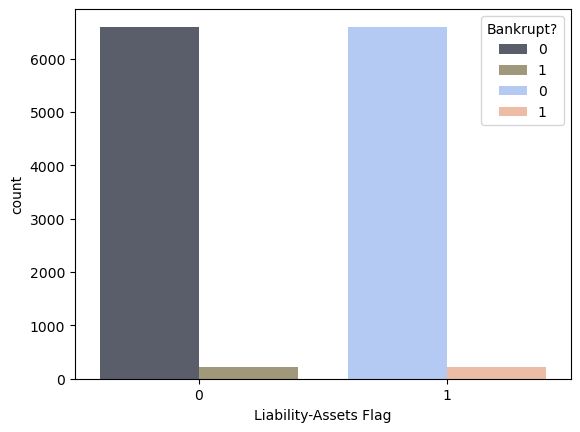

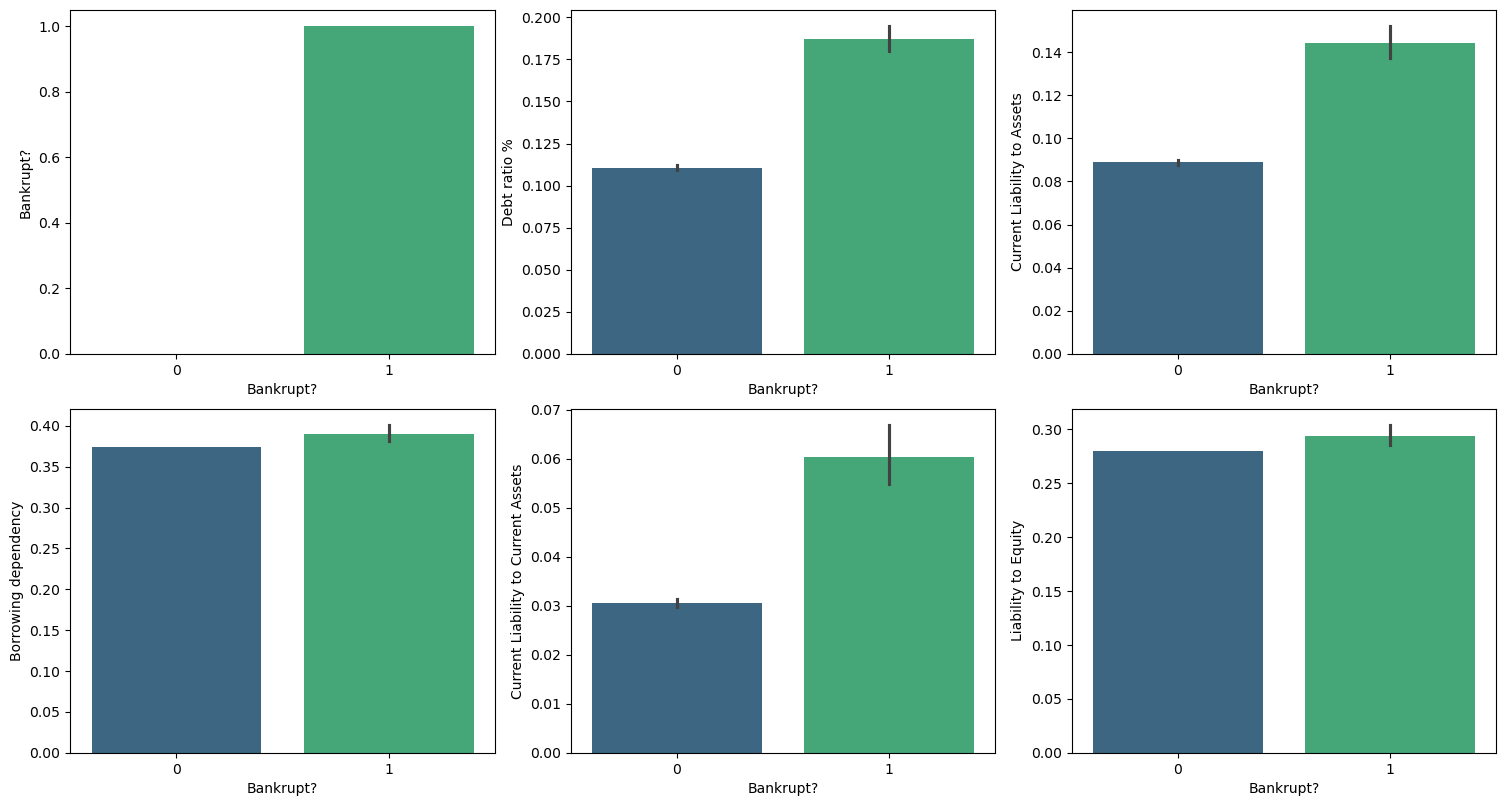

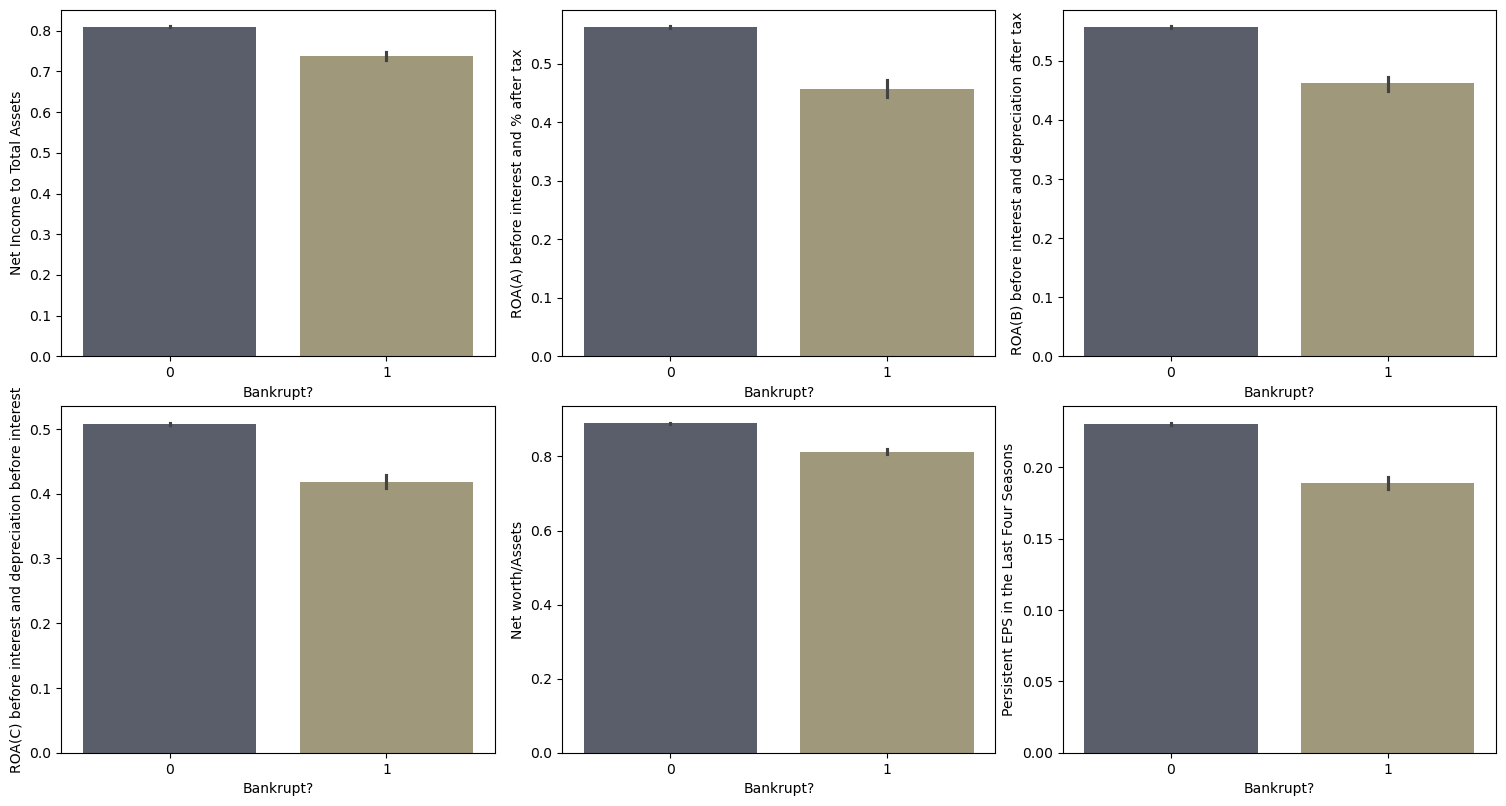

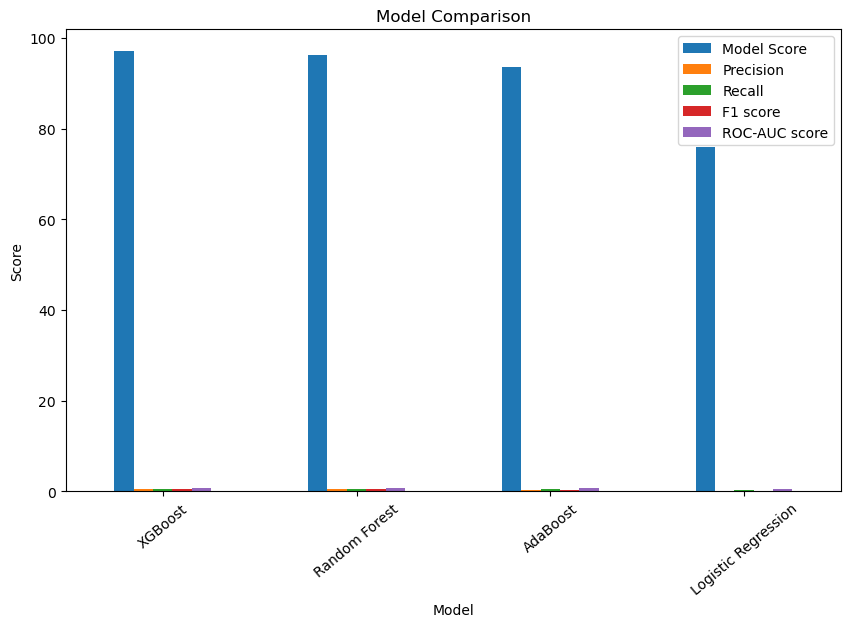

In [125]:
import pandas as pd
import matplotlib.pyplot as plt

# Inputting the data
df = {
    "Model": ["XGBoost", "Random Forest", "AdaBoost", "Logistic Regression"],
    "Model Score": [96.99, 96.11, 93.62, 75.88],
    "Precision": [0.53, 0.43, 0.27, 0.05],
    "Recall": [0.55, 0.59, 0.57, 0.36],
    "F1 score": [0.54, 0.50, 0.36, 0.09],
    "ROC-AUC score": [0.76, 0.78, 0.76, 0.57]
}

# Creating the DataFrame
Models = pd.DataFrame(df)

# Setting model names as the index for easier plotting
Models.set_index("Model", inplace=True)

# Plotting the metrics for all models
Models.plot(kind='bar', figsize=(10, 6))
plt.title("Model Comparison")
plt.ylabel("Score")
plt.xticks(rotation=40)
plt.legend(loc='upper right')
plt.show()


In [126]:
with open("model-1" , "wb") as f:
    pickle.dump(model ,f)

In [127]:
Models = pd.DataFrame(columns=['Algorithm','Model Score','Precision','Recall','F1 score','ROC-AUC score'])

def taining_without_feature_selection(Parameters, Model, Dataframe, Modelname):
    
    df= Dataframe.copy()
    
    X = df.drop('Bankrupt?', axis=1)
    y = df['Bankrupt?']
    
    #Traditional split of the dataset 80% - 20%
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    x_train, x_test, y_train, y_test = x_train.values, x_test.values, y_train.values, y_test.values

    #Proportional split of 80% data with respect to the class of the target feature ie. [1,0]
    sf = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

    for train_index, test_index in sf.split(x_train, y_train):
        sf_x_train, sf_x_test = X.iloc[train_index], X.iloc[test_index]
        sf_y_train, sf_y_test = y.iloc[train_index], y.iloc[test_index]

    sf_x_train, sf_x_test, sf_y_train, sf_y_test = sf_x_train.values, sf_x_test.values, sf_y_train.values, sf_y_test.values
    
    model_parameter_sm = Parameters

    rand_model = RandomizedSearchCV(Model, model_parameter_sm, n_iter=4)
     
    #Identifying the best parameters through RandomizedSearchCV()
    for train, test in sf.split(sf_x_train, sf_y_train):
        pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_model) 
        fitting_model = pipeline.fit(sf_x_train[train], sf_y_train[train])
        best_model = rand_model.best_estimator_

    #Evaluation with against 20% unseen testing data
    print()
    print("Evaluation Of Models")  

    sm = SMOTE(sampling_strategy='minority', random_state=42)
    Xsm_train, ysm_train = sm.fit_resample(sf_x_train, sf_y_train)
    
    print()
    print("Random Model Evaluation")  
    
    final_model_sm = rand_model.best_estimator_
    final_model_sm.fit(Xsm_train, ysm_train)

    prediction = final_model_sm.predict(x_test)

    print(classification_report(y_test, prediction))
    
    model = {}

    model['Algorithm'] = Modelname
    model['Model Score'] = str(round((accuracy_score(y_test, prediction)*100),2)) + "%"
    model['Precision'] = round(precision_score(y_test, prediction),2)
    model['Recall'] = round(recall_score(y_test, prediction),2)
    model['F1 score'] = round(f1_score(y_test, prediction),2)
    model['ROC-AUC score'] = round(roc_auc_score(y_test, prediction),2)
    
    return model

In [128]:
print("Logistic Regression")
TrainedModel = taining_without_feature_selection({"penalty": ['l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}, LogisticRegression(solver='liblinear'), df, "Logistic Regression")
Models = Models.append(TrainedModel,ignore_index=True)


#Print the updated Models DataFrame
#print(Models)

Logistic Regression


AttributeError: 'dict' object has no attribute 'drop'

In [129]:
print("Random Forest Classifier")
TrainedModel = taining_without_feature_selection({"max_depth": [3, 5, 10, None],"n_estimators": [100, 200, 300, 400, 500]},  RandomForestClassifier(), df, "Random Forest Classifier")
Models = Models.append(TrainedModel,ignore_index=True)

#Print the updated Models DataFrame
#print(Models)

Random Forest Classifier


AttributeError: 'dict' object has no attribute 'drop'

In [130]:
from xgboost import XGBClassifier

ModuleNotFoundError: No module named 'xgboost'

In [131]:
from xgboost import XGBClassifier

# Train XGBoost Classifier
print("XGBoost Classifier")
TrainedModel = taining_without_feature_selection(
    {
        "n_estimators": [50, 100, 200, 300],
        "max_depth": [3, 5, 7, 10],
        "learning_rate": [0.01, 0.1, 0.2, 0.3],
        "subsample": [0.5, 0.7, 1.0]
    }, 
    XGBClassifier(use_label_encoder=False, eval_metric='logloss'), 
    df, 
    "XGBoost Classifier"
)

# Append the results to the Models DataFrame
Models = Models.append(TrainedModel, ignore_index=True)

#Print the updated Models DataFrame
#print(Models)


ModuleNotFoundError: No module named 'xgboost'

In [132]:
print("Random Forest Classifier")
TrainedModel = taining_without_feature_selection({"max_depth": [3, 5, 10, None],"n_estimators": [100, 200, 300, 400, 500]},  RandomForestClassifier(), df, "Random Forest Classifier")
Models = Models.append(TrainedModel,ignore_index=True)

Random Forest Classifier


AttributeError: 'dict' object has no attribute 'drop'

# other analysis 

In [97]:
import numpy as np
import pandas as pd
import seaborn as sns
from random import randint
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, f1_score,accuracy_score, precision_score, recall_score, roc_auc_score 

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

import warnings
warnings.filterwarnings("ignore")

In [98]:
df = pd.read_csv('data.csv')

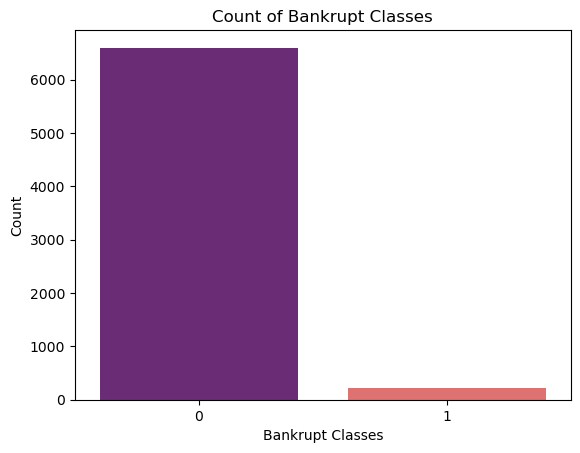

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt
from random import randint

# Define a list of valid color palettes
colors = ["coolwarm", "viridis", "magma", "plasma", "cividis"]

# Randomly choose a palette
value = randint(0, len(colors) - 1)
selected_palette = colors[value]

# Plot the countplot
sns.countplot(x='Bankrupt?', data=df, palette=selected_palette)

# Add labels and title
plt.xlabel("Bankrupt Classes")
plt.ylabel("Count")
plt.title("Count of Bankrupt Classes")

# Display the plot
plt.show()


In [100]:
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.37,0.42,0.41,0.60,0.60,1.00,0.80,0.81,0.30,0.78,0.00,0.00,0.46,0.00,0.00,0.15,0.15,0.15,0.17,0.31,0.02,0.10,0.14,0.02,0.85,0.69,0.69,0.22,4980000000.00,0.00,0.26,0.36,0.00,0.00,0.63,0.02,0.21,0.79,0.01,0.39,0.01,0.10,0.14,0.40,0.09,0.00,0.00,0.00,0.00,0.03,0.03,0.39,0.04,0.67,0.17,0.19,0.00,0.00,0.00,0.15,0.33,0.28,0.00,0.68,0.72,0.34,0.03,0.90,0.00,0.06,701000000.00,6550000000.00,0.59,458000000.00,0.67,0.42,0.68,0.34,0.13,0.64,0.46,0.52,0.31,0.12,0,0.72,0.01,0.62,0.60,0.83,0.29,0.03,0.56,1,0.02
1,1,0.46,0.54,0.52,0.61,0.61,1.00,0.80,0.81,0.30,0.78,0.00,0.00,0.46,0.00,0.00,0.18,0.18,0.18,0.21,0.32,0.02,0.09,0.17,0.02,0.85,0.69,0.69,0.22,6110000000.00,0.00,0.26,0.38,0.01,0.00,0.64,0.01,0.17,0.83,0.01,0.38,0.01,0.09,0.17,0.40,0.06,0.00,0.00,9360000000.00,719000000.00,0.03,0.01,0.39,0.01,0.75,0.13,0.18,0.01,0.00,0.00,0.06,0.34,0.29,0.01,0.31,0.73,0.33,0.02,0.93,0.00,0.03,0.00,7700000000.00,0.59,2490000000.00,0.67,0.47,0.31,0.33,0.12,0.64,0.46,0.57,0.31,0.05,0,0.80,0.01,0.62,0.61,0.84,0.28,0.26,0.57,1,0.02
2,1,0.43,0.50,0.47,0.60,0.60,1.00,0.80,0.81,0.30,0.78,0.00,25500000.00,0.46,0.00,0.00,0.18,0.18,0.19,0.18,0.31,0.01,0.09,0.14,0.02,0.85,0.69,0.69,0.22,7280000000.00,0.00,0.26,0.37,0.01,0.01,0.63,0.02,0.21,0.79,0.01,0.38,0.01,0.09,0.15,0.41,0.01,0.00,0.00,65000000.00,2650000000.00,0.01,0.03,0.38,0.14,0.83,0.3

The records are observed to be highly imbalanced. Thus it is necessary to consider balancing the dataset through "Upsampling or Downsampling" techniques.

Through data.info(), we observed that we have a majority of "float64" data. The categorical data is distinguished as binary 1 and 0, thus stored as "int64". We separate the numeric and categoric data to analyze our dataset.

In [101]:
numeric_features = df.dtypes[df.dtypes != 'int64'].index
categorical_features = df.dtypes[df.dtypes == 'int64'].index

df[categorical_features].columns.tolist()

['Bankrupt?', ' Liability-Assets Flag', ' Net Income Flag']

In [102]:


df.columns = df.columns.str.strip()

In [103]:
# Ensure column name is correct
value = randint(0, len(colors)-1)

# Check the cleaned column name
print(df['Liability-Assets Flag'].value_counts())

# Plot the countplot with correct column name
sns.countplot('Liability-Assets Flag', data=df, palette=colors[value])


Liability-Assets Flag
0    6811
1       8
Name: count, dtype: int64


TypeError: countplot() got multiple values for argument 'data'

The "Liability-Assets" flag denotes the status of an organization, where if the total liability exceeds total assets, the flagged value will be 1, else the value is 0. A majority number of times, organizations/company's assets are more than their liabilities.

In [104]:
value = randint(0, len(colors)-1)

print(df[['Liability-Assets Flag','Bankrupt?']].value_counts())
sns.countplot(x = 'Liability-Assets Flag',hue = 'Bankrupt?',data = df,palette = colors[value])

Liability-Assets Flag  Bankrupt?
0                      0            6597
                       1             214
1                      1               6
                       0               2
Name: count, dtype: int64


<Axes: xlabel='Liability-Assets Flag', ylabel='count'>

A small portion of organizations suffers bankruptcy, although possessing more assets than their liabilities.

In [105]:
value = randint(0, len(colors)-1)

print(df['Net Income Flag'].value_counts())
sns.countplot('Net Income Flag',data=df,palette = colors[value])

Net Income Flag
1    6819
Name: count, dtype: int64


TypeError: countplot() got multiple values for argument 'data'

The "Net Income" flag denotes the status of an organization's income in the last two years, where if the net income is negative for the past two years, the flagged value will be 1, else the value is 0. We observe that all the records have been exhibiting a loss for the past two years

In [106]:
value = randint(0, len(colors)-1)

print(df[['Net Income Flag','Bankrupt?']].value_counts())
sns.countplot(x = 'Net Income Flag',hue = 'Bankrupt?',data = df,palette = colors[value])

Net Income Flag  Bankrupt?
1                0            6599
                 1             220
Name: count, dtype: int64


<Axes: xlabel='Liability-Assets Flag', ylabel='count'>

Many organizations that have suffered losses for the past two years have stabilized their business, thus avoiding bankruptcy.

In [107]:
df.columns = df.columns.str.strip()

In [108]:
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()
print(numeric_features)


['Bankrupt?', 'ROA(C) before interest and depreciation before interest', 'ROA(A) before interest and % after tax', 'ROA(B) before interest and depreciation after tax', 'Operating Gross Margin', 'Realized Sales Gross Margin', 'Operating Profit Rate', 'Pre-tax net Interest Rate', 'After-tax net Interest Rate', 'Non-industry income and expenditure/revenue', 'Continuous interest rate (after tax)', 'Operating Expense Rate', 'Research and development expense rate', 'Cash flow rate', 'Interest-bearing debt interest rate', 'Tax rate (A)', 'Net Value Per Share (B)', 'Net Value Per Share (A)', 'Net Value Per Share (C)', 'Persistent EPS in the Last Four Seasons', 'Cash Flow Per Share', 'Revenue Per Share (Yuan ¥)', 'Operating Profit Per Share (Yuan ¥)', 'Per Share Net profit before tax (Yuan ¥)', 'Realized Sales Gross Profit Growth Rate', 'Operating Profit Growth Rate', 'After-tax Net Profit Growth Rate', 'Regular Net Profit Growth Rate', 'Continuous Net Profit Growth Rate', 'Total Asset Growth R

In [109]:
df.columns = df.columns.str.strip()


In [110]:
# Ensure that 'Bankrupt?' column exists
if "Bankrupt?" not in df.columns:
    raise KeyError("'Bankrupt?' column is missing in the data DataFrame")

In [111]:
# Filter numeric columns in df
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()

In [112]:
# Compute correlations with 'Bankrupt?' and get top 6 features
positive_corr = df[numeric_features].corrwith(df["Bankrupt?"]).sort_values(ascending=False)[:6].index.tolist()
negative_corr = df[numeric_features].corrwith(df["Bankrupt?"]).sort_values()[:6].index.tolist()

In [113]:
# Create DataFrames with the most correlated features
positive_corr = df[positive_corr + ["Bankrupt?"]].copy()
negative_corr = df[negative_corr + ["Bankrupt?"]].copy()

In [114]:
def corrbargraph(x_value, y_value):
    
    plt.figure(figsize=(15,8))
    value = randint(0, len(colors)-1)

    for i in range(1,7):
        plt.subplot(2,3,i)  
        sns.barplot(x = x_value, y = y_value[i-1],data = df,palette = colors[value])

    plt.tight_layout(pad=0.5)

In [115]:
x_value = positive_corr.columns.tolist()[-1]
y_value = positive_corr.columns.tolist()[:-1]

corrbargraph(x_value, y_value)

We see that three attributes - "Debt Ratio %, Current Liability To Assets, Current Liability To Current Assets" are commonly high in bankrupt organizations.

In [116]:
x_value = negative_corr.columns.tolist()[-1]
y_value = negative_corr.columns.tolist()[:-1]

corrbargraph(x_value, y_value)

These attributes show us that the more the assets and earing of a company, the less likely is the organization to be bankrupt.
Let us check the relation of top six positive and negative correlation attributes among eachother

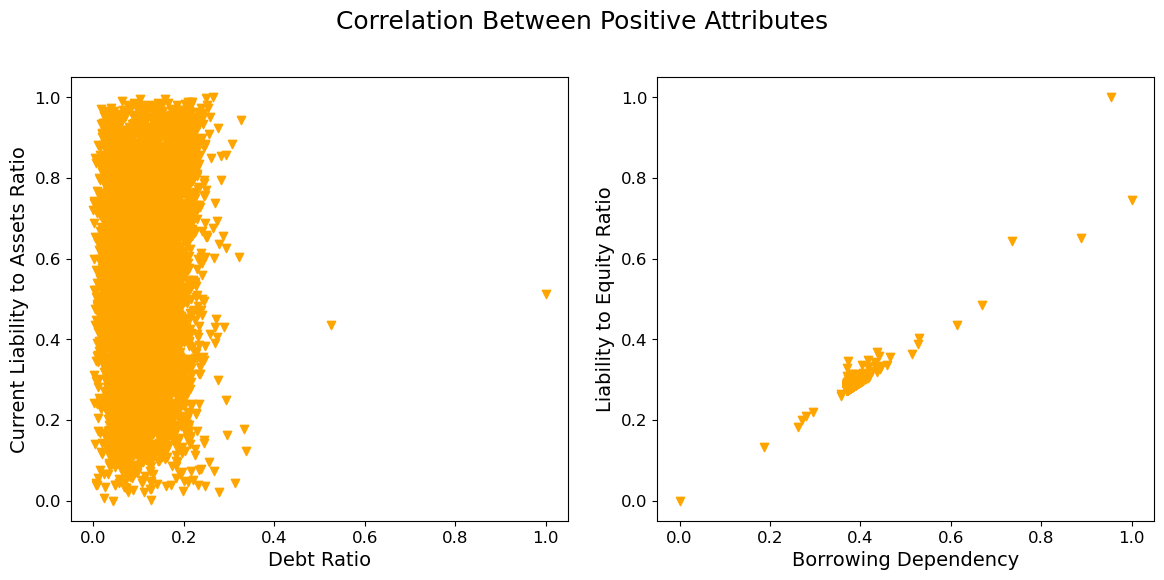

In [85]:
import matplotlib.pyplot as plt

# Create the figure with a larger size for better visibility
plt.figure(figsize=(12, 6))

# Set the main title with larger font size
plt.suptitle("Correlation Between Positive Attributes", fontsize=18)

# First subplot for "Debt Ratio" vs "Current Liability To Assets Ratio"
plt.subplot(1, 2, 1)
plt.xlabel("Debt Ratio", fontsize=14)  # Increased font size for x-axis label
plt.ylabel("Current Liability to Assets Ratio", fontsize=14)  # Increased font size for y-axis label
plt.scatter(df["Debt ratio %"], df["Current Assets/Total Assets"], marker='v', color='orange')
plt.tick_params(axis='both', labelsize=12)  # Increase font size of ticks

# Second subplot for "Borrowing Dependency" vs "Liability to Equity Ratio"
plt.subplot(1, 2, 2)
plt.xlabel("Borrowing Dependency", fontsize=14)  # Increased font size for x-axis label
plt.ylabel("Liability to Equity Ratio", fontsize=14)  # Increased font size for y-axis label
plt.scatter(df["Borrowing dependency"], df["Liability to Equity"], marker='v', color='orange')
plt.tick_params(axis='both', labelsize=12)  # Increase font size of ticks

# Adjust the layout to prevent overlap of subplots
plt.tight_layout(pad=2.0)

# Display the plots
plt.show()



There is a positive relation between attributes that have a high correlation with the target attribute.

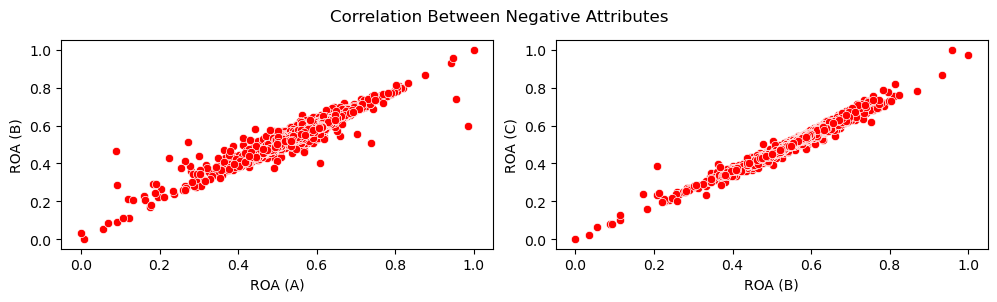

In [86]:
plt.figure(figsize=(10,3))

plt.suptitle("Correlation Between Negative Attributes")

plt.subplot(1,2,1)
plt.xlabel("ROA (A)")
plt.ylabel("ROA (B)")
sns.scatterplot(data=df, x='ROA(A) before interest and % after tax', y='ROA(B) before interest and depreciation after tax',color = 'red')

plt.subplot(1,2,2)
plt.xlabel("ROA (B)")
plt.ylabel("ROA (C)")
sns.scatterplot(data=df, x='ROA(B) before interest and depreciation after tax', y='ROA(C) before interest and depreciation before interest',color = 'red')

plt.tight_layout(pad=0.8)

There is a positive relation between attributes that have a low correlation with the target attribute.

For the sake of simplicity, we analyze the six top positively and negatively correlated attributes.

<AxesSubplot:>

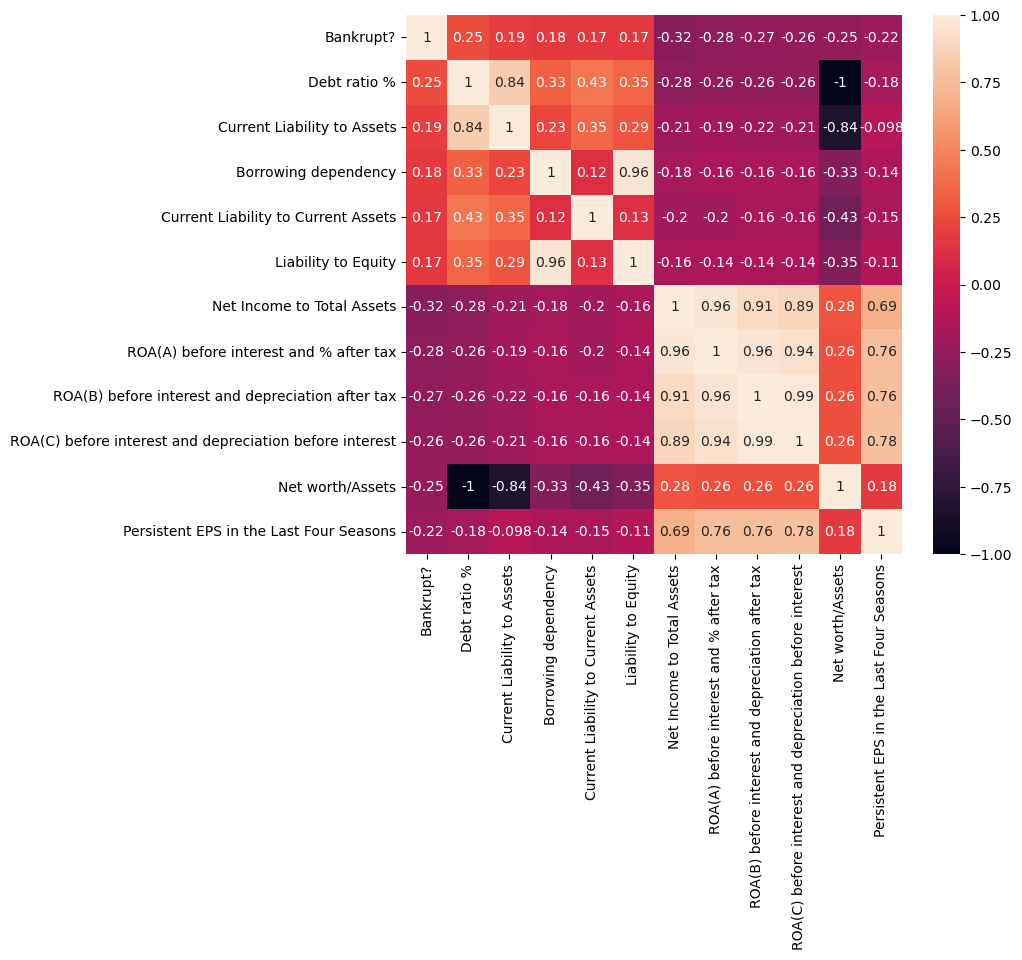

In [87]:
relation = positive_corr.columns.tolist()[:-1] + negative_corr.columns.tolist()[:-1]
plt.figure(figsize=(8,7))
sns.heatmap(df[relation].corr(),annot=True)

A total correlation of the top 12 attributes are given above

# Summary of Analysis¶

The number of organizations that have gone bankrupt in 10 years between 1999 – 2000 is few.
Several companies possess many assets, which is always a good sign for an organization.
An organization cannot guarantee not being bankrupt, although owning several assets.
The organizations in the dataset are running into losses for the past two years as their net income poses to be negative.
Very few of the organizations that have had negative income in the past two years suffer from bankruptcy.
It is observed that “Debt Ratio %, Current Liability To Assets, Current Liability To Current Assets" attributes are a few of the attributes that have a high correlation with the target attribute.
An increase in the values of the attributes “Debt Ratio %, Current Liability To Assets, Current Liability To Current Assets” causes an organization to suffer heavy losses, thus resulting in bankruptcy.
An increase in the values of the attributes that have a negative correlation with the target attribute helps an organization avoid bankruptcy.
There seems to be a relation between attributes that have a high correlation with the target attribute and a low correlation with the target attribute.
We observed several correlations among the top 12 attributes, one of which being “Net Worth/Assets and Debt Ratio %” that is negatively correlated with one another.

# Data Modeling

In [88]:
numeric_features = df.dtypes[df.dtypes != 'int64'].index
df[numeric_features] = df[numeric_features].apply(lambda x: (x - x.mean()) / (x.std()))

df[numeric_features] = df[numeric_features].fillna(0)

The numeric attributes have been normalized.


Our dataset is highly imbalanced. Thus before training the model, we need to deal with this data. Let us lay down some steps we must follow when we come across an imbalanced dataset.

Split the dataset into training and testing sets (80% - 20%). We preserve the 20% testing set for the final evaluation.
Through "Stratified K Fold Cross-Validation" we will now distribute the 80% training set into further training and testing splits.
Since we are dealing with over 50 features, we use "Randomized Search Cross-Validation" as this technique proves to perform better with many features.

model developent 

In [89]:
Models = pd.DataFrame(columns=['Algorithm','Model Score','Precision','Recall','F1 score','ROC-AUC score'])

def taining_without_feature_selection(Parameters, Model, Dataframe, Modelname):
    
    df= Dataframe.copy()
    
    X = df.drop('Bankrupt?', axis=1)
    y = df['Bankrupt?']
    
    #Traditional split of the dataset 80% - 20%
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    x_train, x_test, y_train, y_test = x_train.values, x_test.values, y_train.values, y_test.values

    #Proportional split of 80% data with respect to the class of the target feature ie. [1,0]
    sf = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

    for train_index, test_index in sf.split(x_train, y_train):
        sf_x_train, sf_x_test = X.iloc[train_index], X.iloc[test_index]
        sf_y_train, sf_y_test = y.iloc[train_index], y.iloc[test_index]

    sf_x_train, sf_x_test, sf_y_train, sf_y_test = sf_x_train.values, sf_x_test.values, sf_y_train.values, sf_y_test.values
    
    model_parameter_sm = Parameters

    rand_model = RandomizedSearchCV(Model, model_parameter_sm, n_iter=4)
     
    #Identifying the best parameters through RandomizedSearchCV()
    for train, test in sf.split(sf_x_train, sf_y_train):
        pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_model) 
        fitting_model = pipeline.fit(sf_x_train[train], sf_y_train[train])
        best_model = rand_model.best_estimator_

    #Evaluation with against 20% unseen testing data
    print()
    print("Evaluation Of Models")  

    sm = SMOTE(sampling_strategy='minority', random_state=42)
    Xsm_train, ysm_train = sm.fit_resample(sf_x_train, sf_y_train)
    
    print()
    print("Random Model Evaluation")  
    
    final_model_sm = rand_model.best_estimator_
    final_model_sm.fit(Xsm_train, ysm_train)

    prediction = final_model_sm.predict(x_test)

    print(classification_report(y_test, prediction))
    
    model = {}

    model['Algorithm'] = Modelname
    model['Model Score'] = str(round((accuracy_score(y_test, prediction)*100),2)) + "%"
    model['Precision'] = round(precision_score(y_test, prediction),2)
    model['Recall'] = round(recall_score(y_test, prediction),2)
    model['F1 score'] = round(f1_score(y_test, prediction),2)
    model['ROC-AUC score'] = round(roc_auc_score(y_test, prediction),2)
    
    return model

In [90]:
# Assuming your code already has the necessary imports and data preprocessing steps

# Make sure these variables are properly defined
X = df.drop('Bankrupt?', axis=1)
y = df['Bankrupt?']

# Traditional 80-20 split (train-test)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now, check the class distribution in the training set before applying SMOTE
print("Class Distribution Before SMOTE:")
print(y_train.value_counts())

# Stratified KFold splitting for cross-validation
sf = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
for train_index, test_index in sf.split(x_train, y_train):
    sf_x_train, sf_x_test = X.iloc[train_index], X.iloc[test_index]
    sf_y_train, sf_y_test = y.iloc[train_index], y.iloc[test_index]

# Check the class distribution after the Stratified Split, before SMOTE
print("\nClass Distribution After Stratified Split (Before SMOTE):")
print(sf_y_train.value_counts())

# Apply SMOTE to balance the class distribution
sm = SMOTE(sampling_strategy='minority', random_state=42)
Xsm_train, ysm_train = sm.fit_resample(sf_x_train, sf_y_train)

# Check the class distribution after applying SMOTE
print("\nClass Distribution After SMOTE:")
print(pd.Series(ysm_train).value_counts())


Class Distribution Before SMOTE:
0    5286
1     169
Name: Bankrupt?, dtype: int64

Class Distribution After Stratified Split (Before SMOTE):
0    4183
1     181
Name: Bankrupt?, dtype: int64

Class Distribution After SMOTE:
1    4183
0    4183
Name: Bankrupt?, dtype: int64


In [91]:
pip install imbalanced-learn


Class Distribution Before SMOTE:
0    717
1     83
Name: Bankrupt?, dtype: int64

Class Distribution After Stratified Split (Before SMOTE):
0    578
1     62
Name: Bankrupt?, dtype: int64

Class Distribution After SMOTE:
0    578
1    578
Name: Bankrupt?, dtype: int64


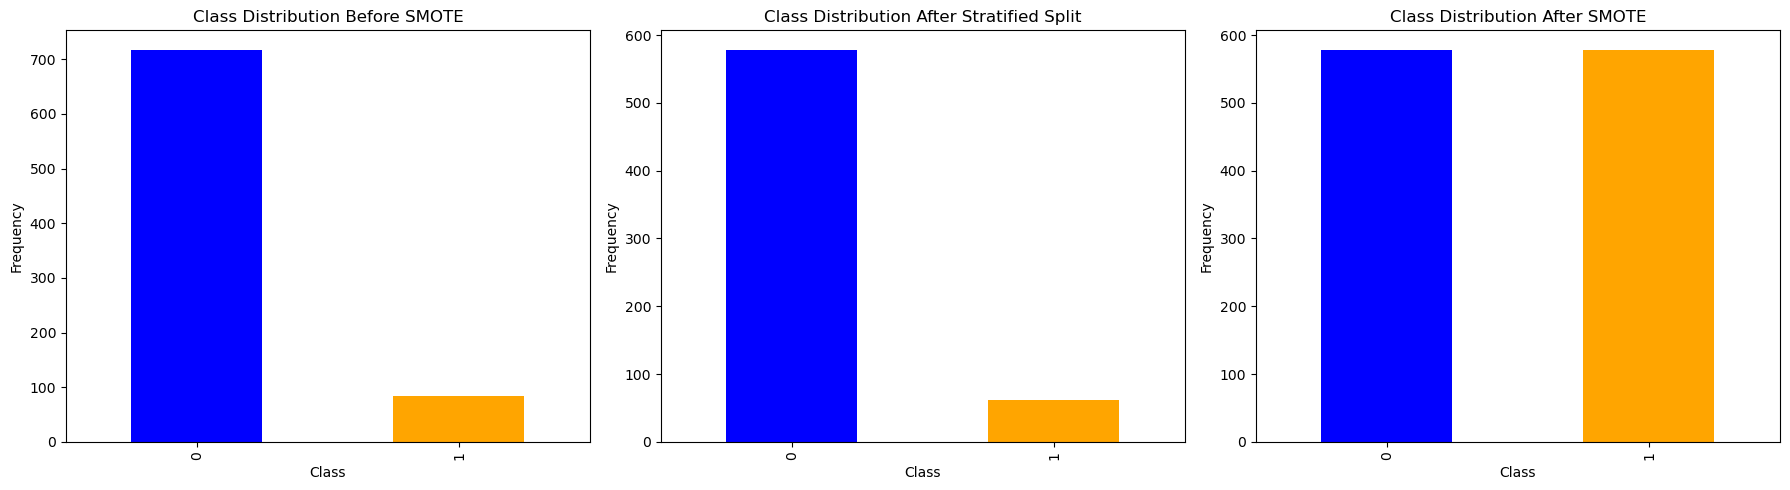

In [138]:
# visualization of SMOTE DATA ANALYSIS 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold
from imblearn.over_sampling import SMOTE

# Generating example data
import numpy as np
np.random.seed(42)
data_size = 1000
df = pd.DataFrame({
    'Feature1': np.random.rand(data_size),
    'Feature2': np.random.rand(data_size),
    'Bankrupt?': np.random.choice([0, 1], size=data_size, p=[0.9, 0.1])  # Imbalanced data
})

# Splitting data
X = df.drop('Bankrupt?', axis=1)
y = df['Bankrupt?']

# Traditional 80-20 split (train-test)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Checking class distribution before SMOTE
print("Class Distribution Before SMOTE:")
print(y_train.value_counts())

# Stratified KFold splitting
sf = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
for train_index, test_index in sf.split(x_train, y_train):
    sf_x_train, sf_x_test = X.iloc[train_index], X.iloc[test_index]
    sf_y_train, sf_y_test = y.iloc[train_index], y.iloc[test_index]
    break  # Using only the first split for demonstration purposes

# Checking class distribution after Stratified Split, before SMOTE
print("\nClass Distribution After Stratified Split (Before SMOTE):")
print(sf_y_train.value_counts())

# Applying SMOTE to balance the class distribution
sm = SMOTE(sampling_strategy='minority', random_state=42)
Xsm_train, ysm_train = sm.fit_resample(sf_x_train, sf_y_train)

# Checking class distribution after SMOTE
print("\nClass Distribution After SMOTE:")
print(pd.Series(ysm_train).value_counts())

# Plotting class distribution
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
axes = axes.ravel()

# Before SMOTE
y_train.value_counts().plot(kind='bar', ax=axes[0], color=['blue', 'orange'])
axes[0].set_title('Class Distribution Before SMOTE')
axes[0].set_xlabel('Class')
axes[0].set_ylabel('Frequency')

# After Stratified Split
sf_y_train.value_counts().plot(kind='bar', ax=axes[1], color=['blue', 'orange'])
axes[1].set_title('Class Distribution After Stratified Split')
axes[1].set_xlabel('Class')
axes[1].set_ylabel('Frequency')

# After SMOTE
pd.Series(ysm_train).value_counts().plot(kind='bar', ax=axes[2], color=['blue', 'orange'])
axes[2].set_title('Class Distribution After SMOTE')
axes[2].set_xlabel('Class')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


Evaluation of Logistic Regression
              precision    recall  f1-score   support

           0       0.97      0.77      0.86      1320
           1       0.05      0.36      0.09        44

    accuracy                           0.76      1364
   macro avg       0.51      0.57      0.47      1364
weighted avg       0.94      0.76      0.84      1364


Feature Importance for Random Forest:
 Total debt/Total net worth                 0.07
 Borrowing dependency                       0.06
 Continuous interest rate (after tax)       0.06
 Net Income to Total Assets                 0.05
 Retained Earnings to Total Assets          0.05
 After-tax net Interest Rate                0.05
 Persistent EPS in the Last Four Seasons    0.05
 Liability to Equity                        0.03
 Per Share Net profit before tax (Yuan ¥)   0.03
 Debt ratio %                               0.03
dtype: float64


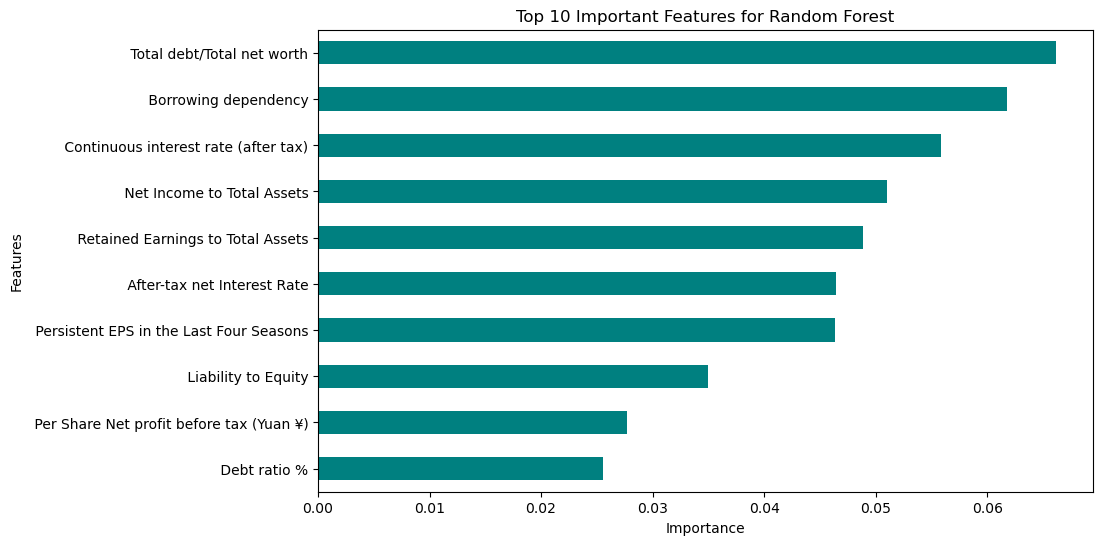

Evaluation of Random Forest
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1320
           1       0.43      0.59      0.50        44

    accuracy                           0.96      1364
   macro avg       0.71      0.78      0.74      1364
weighted avg       0.97      0.96      0.96      1364


Feature Importance for XGBoost:
 Continuous interest rate (after tax)                      0.38
 Total debt/Total net worth                                0.07
 Borrowing dependency                                      0.04
 Net Income to Stockholder's Equity                        0.03
 Retained Earnings to Total Assets                         0.03
 Net Income to Total Assets                                0.02
 Average Collection Days                                   0.01
 ROA(C) before interest and depreciation before interest   0.01
 Interest-bearing debt interest rate                       0.01
 Operating Gross Margin             

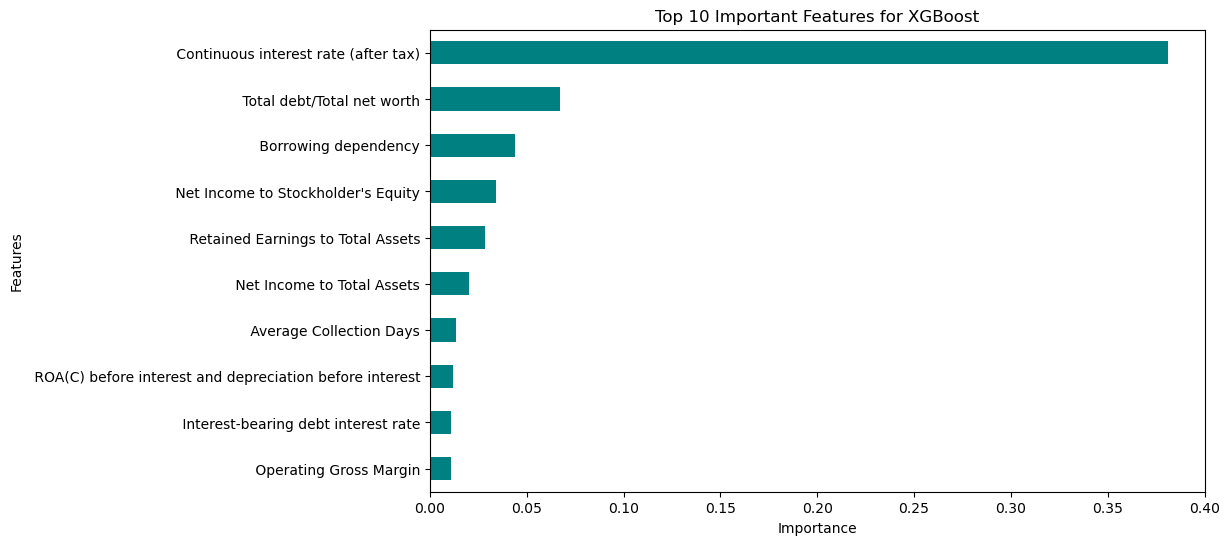

Evaluation of XGBoost
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1320
           1       0.53      0.55      0.54        44

    accuracy                           0.97      1364
   macro avg       0.76      0.76      0.76      1364
weighted avg       0.97      0.97      0.97      1364


Feature Importance for AdaBoost:
 Total debt/Total net worth             0.06
 Cash Turnover Rate                     0.04
 Inventory Turnover Rate (times)        0.03
 Net Income to Total Assets             0.03
 Revenue Per Share (Yuan ¥)             0.03
 Interest Expense Ratio                 0.03
 Long-term fund suitability ratio (A)   0.03
 Cash/Current Liability                 0.03
 Continuous Net Profit Growth Rate      0.03
 Fixed Assets Turnover Frequency        0.03
dtype: float64


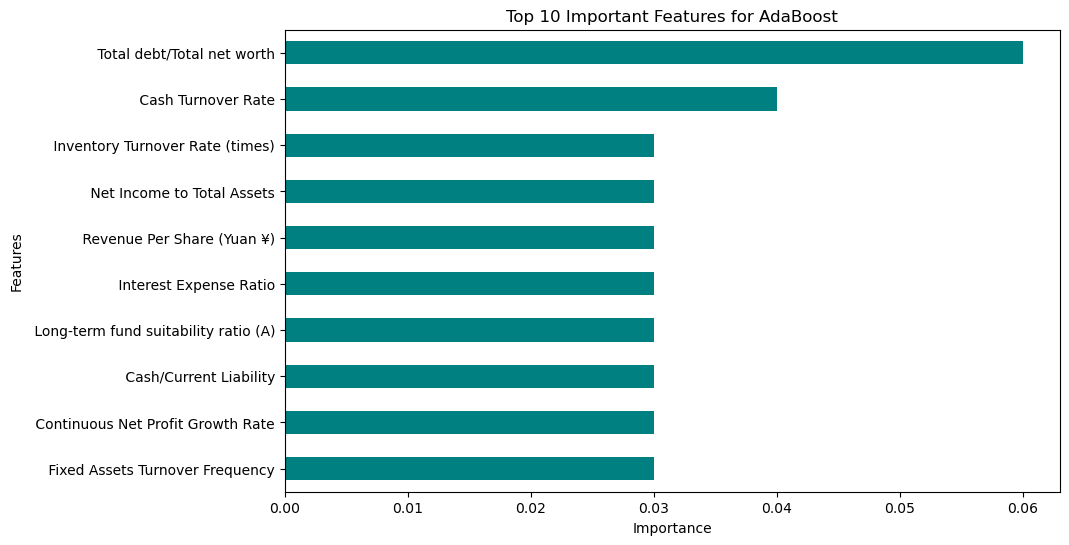

Evaluation of AdaBoost
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1320
           1       0.27      0.57      0.36        44

    accuracy                           0.94      1364
   macro avg       0.63      0.76      0.67      1364
weighted avg       0.96      0.94      0.95      1364

             Algorithm Model Score  Precision  Recall  F1 score  ROC-AUC score
0  Logistic Regression      75.88%       0.05    0.36      0.09           0.57
1        Random Forest      96.11%       0.43    0.59      0.50           0.78
2              XGBoost      96.99%       0.53    0.55      0.54           0.76
3             AdaBoost      93.62%       0.27    0.57      0.36           0.76


In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE

# Initialize a DataFrame to store evaluation metrics
Models = pd.DataFrame(columns=['Algorithm', 'Model Score', 'Precision', 'Recall', 'F1 score', 'ROC-AUC score'])

# Function to train and evaluate models
def train_and_evaluate(Parameters, Model, Dataframe, Modelname):
    df = Dataframe.copy()
    
    # Splitting features and target variable
    X = df.drop('Bankrupt?', axis=1)
    y = df['Bankrupt?']
    
    # Split dataset into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    
    # Perform SMOTE on training data
    sm = SMOTE(sampling_strategy='minority', random_state=42)
    Xsm_train, ysm_train = sm.fit_resample(x_train, y_train)

    # Perform hyperparameter tuning
    rand_model = RandomizedSearchCV(Model, Parameters, n_iter=4, random_state=42, cv=3)
    rand_model.fit(Xsm_train, ysm_train)
    
    # Best model after tuning
    best_model = rand_model.best_estimator_

    # Feature importance (for tree-based models)
    if hasattr(best_model, 'feature_importances_'):
        feature_importances = pd.Series(best_model.feature_importances_, index=X.columns).sort_values(ascending=False)
        print(f"\nFeature Importance for {Modelname}:")
        print(feature_importances.head(10))

        # Plot top 10 features
        plt.figure(figsize=(10, 6))
        feature_importances.head(10).plot(kind='barh', color='teal')
        plt.xlabel("Importance")
        plt.ylabel("Features")
        plt.title(f"Top 10 Important Features for {Modelname}")
        plt.gca().invert_yaxis()
        plt.show()

    # Evaluate the model on testing data
    predictions = best_model.predict(x_test)

    print(f"Evaluation of {Modelname}")
    print(classification_report(y_test, predictions))

    # Store evaluation metrics
    model_metrics = {
        'Algorithm': Modelname,
        'Model Score': f"{accuracy_score(y_test, predictions) * 100:.2f}%",
        'Precision': round(precision_score(y_test, predictions), 2),
        'Recall': round(recall_score(y_test, predictions), 2),
        'F1 score': round(f1_score(y_test, predictions), 2),
        'ROC-AUC score': round(roc_auc_score(y_test, predictions), 2),
    }

    return model_metrics

# Load your data
# Replace `your_dataframe` with your actual dataset
df = pd.read_csv('data.csv')

# Model parameters
log_reg_params = {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l2']}
rf_params = {'n_estimators': [100, 200], 'max_depth': [10, 20, None], 'min_samples_split': [2, 5]}
xgb_params = {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 6]}
ada_params = {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1, 1]}

# Train models
log_reg_model = LogisticRegression(solver='liblinear', random_state=42)
rf_model = RandomForestClassifier(random_state=42)
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
ada_model = AdaBoostClassifier(random_state=42)

# Collect results
# Uncomment this line after providing your dataset
Models = Models.append(train_and_evaluate(log_reg_params, log_reg_model, df, 'Logistic Regression'), ignore_index=True)
Models = Models.append(train_and_evaluate(rf_params, rf_model, df, 'Random Forest'), ignore_index=True)
Models = Models.append(train_and_evaluate(xgb_params, xgb_model, df, 'XGBoost'), ignore_index=True)
Models = Models.append(train_and_evaluate(ada_params, ada_model, df, 'AdaBoost'), ignore_index=True)

# Display results
print(Models)


In [96]:
!pip install shap


     -------------------------------------- 456.1/456.1 kB 2.0 MB/s eta 0:00:00


In [98]:
import shap
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split

# 1. Load your dataset (replace 'data' with your actual dataset)
# Assuming 'data' is a DataFrame where the last column is the target variable (y)
X = data.drop(columns=['target'])  # Replace 'target' with the actual column name of your target variable
y = data['target']  # Replace 'target' with the actual column name of your target variable

# 2. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Train an XGBoost model
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

# 4. Calculate SHAP values using the model
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

# 5. Visualize the feature importance
shap.summary_plot(shap_values, X_train)

# 6. Identify the most important features (e.g., top 10)
# SHAP importance summary
shap.summary_plot(shap_values, X_train, plot_type="bar")

# Extract the feature importance based on SHAP values
importance = pd.DataFrame(list(zip(X.columns, shap_values.mean(0))), columns=['Feature', 'Importance'])
importance = importance.sort_values(by='Importance', ascending=False)

# Display the top 10 important features
top_10_features = importance.head(10)
print("Top 10 Features Based on SHAP Importance:")
print(top_10_features)

# 7. Reduce the feature set by selecting the most important features
X_train_reduced = X_train[top_10_features['Feature']]
X_test_reduced = X_test[top_10_features['Feature']]

# 8. Retrain the model using the reduced feature set
model_reduced = xgb.XGBClassifier()
model_reduced.fit(X_train_reduced, y_train)

# 9. Evaluate the model (you can use any metric like accuracy, precision, recall, etc.)
accuracy = model_reduced.score(X_test_reduced, y_test)
print(f"Accuracy with reduced feature set: {accuracy:.4f}")


AttributeError: 'dict' object has no attribute 'drop'

In [139]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline

Models = pd.DataFrame(columns=['Algorithm', 'Model Score', 'Precision', 'Recall', 'F1 score', 'ROC-AUC score'])


In [140]:
def training_without_feature_selection(Parameters, Model, Dataframe, Modelname):
    df = Dataframe.copy()
    
    # Split data into X (features) and y (target)
    X = df.drop('Bankrupt?', axis=1)
    y = df['Bankrupt?']
    
    # Split the dataset into training (80%) and testing (20%) sets
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    x_train, x_test, y_train, y_test = x_train.values, x_test.values, y_train.values, y_test.values


In [141]:
  def training_without_feature_selection(Parameters, Model, Dataframe, Modelname):
    # This line is indented to be inside the function
    df = Dataframe.copy()

    # Split data into X (features) and y (target)
    X = df.drop('Bankrupt?', axis=1)
    y = df['Bankrupt?']
    
    # Split the dataset into training (80%) and testing (20%) sets
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Stratified KFold cross-validation (5 splits)
    sf = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
    
    # Split the training data into stratified folds
    for train_index, test_index in sf.split(x_train, y_train):
        sf_x_train, sf_x_test = x_train.iloc[train_index], x_train.iloc[test_index]
        sf_y_train, sf_y_test = y_train.iloc[train_index], y_train.iloc[test_index]
        
    # Convert to numpy arrays for model training
    sf_x_train, sf_x_test, sf_y_train, sf_y_test = sf_x_train.values, sf_x_test.values, sf_y_train.values, sf_y_test.values


In [142]:
from sklearn.model_selection import StratifiedKFold, train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from sklearn.model_selection import RandomizedSearchCV

def training_without_feature_selection(Parameters, Model, Dataframe, Modelname):
    # Step 1: Copy the dataframe to avoid modifying the original
    df = Dataframe.copy()

    # Step 2: Separate features (X) and target variable (y)
    X = df.drop('Bankrupt?', axis=1)
    y = df['Bankrupt?']
    
    # Step 3: Split the data into training (80%) and testing (20%) sets
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Step 4: Apply Stratified K-Fold cross-validation (5 splits)
    sf = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
    
    # Step 5: Initialize variables for training and evaluation
    sf_x_train, sf_x_test, sf_y_train, sf_y_test = None, None, None, None

    # Step 6: Stratified K-Fold split (iterating over the training set only)
    for train_index, test_index in sf.split(x_train, y_train):
        sf_x_train, sf_x_test = x_train.iloc[train_index], x_train.iloc[test_index]
        sf_y_train, sf_y_test = y_train.iloc[train_index], y_train.iloc[test_index]
    
    # Convert to numpy arrays for model training
    sf_x_train, sf_x_test, sf_y_train, sf_y_test = sf_x_train.values, sf_x_test.values, sf_y_train.values, sf_y_test.values
    
    # Step 7: Apply SMOTE resampling to the training data
    sm = SMOTE(sampling_strategy='minority', random_state=42)
    Xsm_train, ysm_train = sm.fit_resample(sf_x_train, sf_y_train)

    # Step 8: Initialize the RandomizedSearchCV model with the specified parameters
    rand_model = RandomizedSearchCV(Model, Parameters, n_iter=4)

    # Step 9: Fit the model with SMOTE resampled data
    rand_model.fit(Xsm_train, ysm_train)

    # Step 10: Make predictions on the unseen test data (20%)
    prediction = rand_model.predict(x_test)
    
    # Step 11: Evaluate the model's performance
    print("\nRandom Model Evaluation")
    print(classification_report(y_test, prediction))

    # Step 12: Store the evaluation metrics in a dictionary
    model = {}
    model['Algorithm'] = Modelname
    model['Model Score'] = str(round((accuracy_score(y_test, prediction)*100),2)) + "%"
    model['Precision'] = round(precision_score(y_test, prediction),2)
    model['Recall'] = round(recall_score(y_test, prediction),2)
    model['F1 score'] = round(f1_score(y_test, prediction),2)
    model['ROC-AUC score'] = round(roc_auc_score(y_test, prediction),2)
    
    return model


SMOTE (Synthetic Minority Over-sampling Technique) is used to address class imbalance by generating synthetic samples for the minority class (e.g., companies that went bankrupt). This ensures that the model is trained on balanced data, helping it to avoid bias toward the majority class.

A Randomized Search Cross-Validation is applied to the model to search for the best combination of hyperparameters from a predefined list (Parameters). This step ensures that the model is trained with the optimal settings.

Summary of Key Steps:
Data preparation: Splits data into features and target variable, then splits it into training and test datasets.
Stratified K-Fold: Ensures that the distribution of the target variable is preserved in each fold during cross-validation.
SMOTE: Resamples the data to address class imbalance by generating synthetic examples for the minority class.
RandomizedSearchCV: Tunes the model’s hyperparameters to find the best performing configuration.
Model evaluation: The model is tested on unseen data (test set), and key performance metrics are printed.
The purpose of this code is to build and evaluate a model that can predict whether a company will go bankrupt, ensuring that the model is trained on balanced data, with optimized hyperparameters, and tested on unseen data.

# Logistic Regression 

In [180]:
print("Logistic Regression")
TrainedModel = taining_without_feature_selection({"penalty": ['l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}, LogisticRegression(solver='liblinear'), df, "Logistic Regression")
Models = Models.append(TrainedModel,ignore_index=True)


#Print the updated Models DataFrame
#print(Models)

Logistic Regression

Evaluation Of Models

Random Model Evaluation
              precision    recall  f1-score   support

           0       0.99      0.89      0.94      1313
           1       0.23      0.82      0.36        51

    accuracy                           0.89      1364
   macro avg       0.61      0.86      0.65      1364
weighted avg       0.96      0.89      0.92      1364



# Random forest 

In [181]:
print("Random Forest Classifier")
TrainedModel = taining_without_feature_selection({"max_depth": [3, 5, 10, None],"n_estimators": [100, 200, 300, 400, 500]},  RandomForestClassifier(), df, "Random Forest Classifier")
Models = Models.append(TrainedModel,ignore_index=True)

#Print the updated Models DataFrame
#print(Models)

Random Forest Classifier

Evaluation Of Models

Random Model Evaluation
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1313
           1       0.81      0.94      0.87        51

    accuracy                           0.99      1364
   macro avg       0.91      0.97      0.93      1364
weighted avg       0.99      0.99      0.99      1364



# XGBOOST

In [182]:
pip install xgboost


In [183]:
from xgboost import XGBClassifier

In [184]:
from xgboost import XGBClassifier

# Train XGBoost Classifier
print("XGBoost Classifier")
TrainedModel = taining_without_feature_selection(
    {
        "n_estimators": [50, 100, 200, 300],
        "max_depth": [3, 5, 7, 10],
        "learning_rate": [0.01, 0.1, 0.2, 0.3],
        "subsample": [0.5, 0.7, 1.0]
    }, 
    XGBClassifier(use_label_encoder=False, eval_metric='logloss'), 
    df, 
    "XGBoost Classifier"
)

# Append the results to the Models DataFrame
Models = Models.append(TrainedModel, ignore_index=True)

#Print the updated Models DataFrame
#print(Models)


XGBoost Classifier

Evaluation Of Models

Random Model Evaluation
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1313
           1       0.87      0.92      0.90        51

    accuracy                           0.99      1364
   macro avg       0.93      0.96      0.95      1364
weighted avg       0.99      0.99      0.99      1364



# AdaBoostClassifire

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Train AdaBoost Classifier
print("AdaBoost Classifier")
TrainedModel = taining_without_feature_selection(
    {
        "n_estimators": [50, 100, 200, 300],
        "learning_rate": [0.01, 0.1, 0.2, 0.5, 1.0]
    }, 
    AdaBoostClassifier(), 
    df, 
    "AdaBoost Classifier"
)

# Append the results to the Models DataFrame
Models = Models.append(TrainedModel, ignore_index=True)

#Print the updated Models DataFrame
#print(Models)


AdaBoost Classifier


In [ ]:
Models.sort_values('F1 score',ascending=False)